Please read the case in file called "AppDelivery CRM Data Analyst Case" before read this notebook to get context

In [1]:
#Libraries import
import pandas as pd
from pandas import DataFrame as df
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Data Import
data0=pd.read_csv("database.csv")

### Initial exploration

In [3]:
#Existing columns
columns_data0 = data0.columns.values.tolist()
#Dataframe of Existing columns
df([columns_data0],index=["Columns"]).T

,Columns
0,ID
1,Year_Birth
2,Education
3,Marital_Status
4,Income
5,Kidhome
6,Teenhome
7,Dt_Customer
8,Recency
9,MntWines


In [4]:
#Initial look of the columns
pd.set_option('display.max_columns',data0.shape[1]+1) #Show all columns in pandas
#Command of showing data
data0

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [5]:
#Not relevant variables
for i in ["Z_CostContact","Z_Revenue"]:
    print(i+" only has one value and is",data0[i].unique(),", so it will be ignored")

Z_CostContact only has one value and is [3] , so it will be ignored
Z_Revenue only has one value and is [11] , so it will be ignored


In [6]:
index_variable = "ID"
irrelevant_variables = "Z_CostContact","Z_Revenue"
numeric_variables = 'Year_Birth','Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth' 
text_categorical_variables = "Education","Marital_Status"
numeric_categorial_variables = 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain',
total_categoricals = text_categorical_variables + numeric_categorial_variables
date_variable = "Dt_Customer"
response_variable = "Response"
types_of_variables = ["index_variable","irrelevant_variables","numeric_variables","text_categorical_variables","numeric_categorial_variables","total_categoricals","date_variable","response_variable"]

### Variable distribution plots

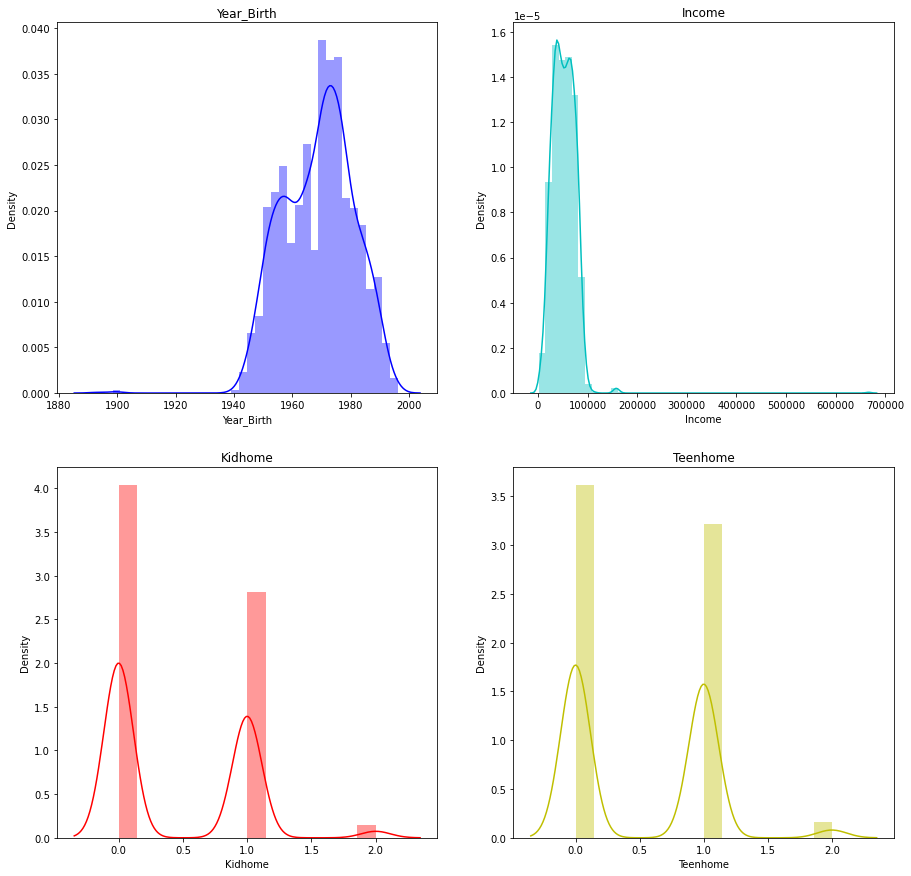

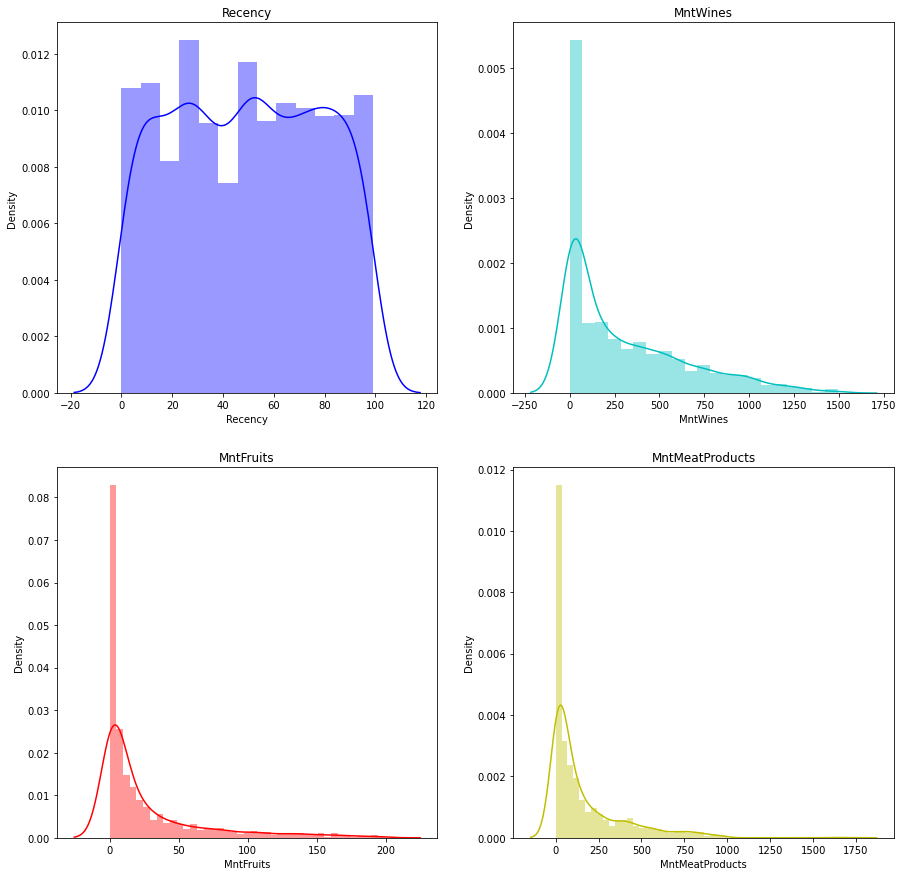

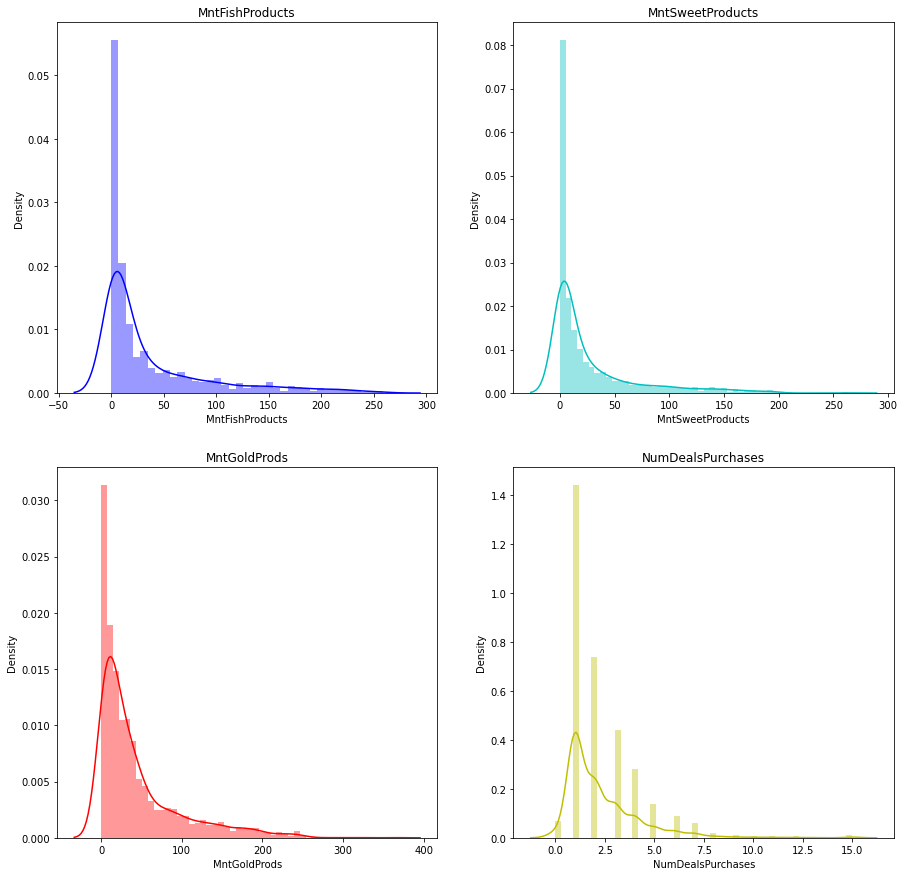

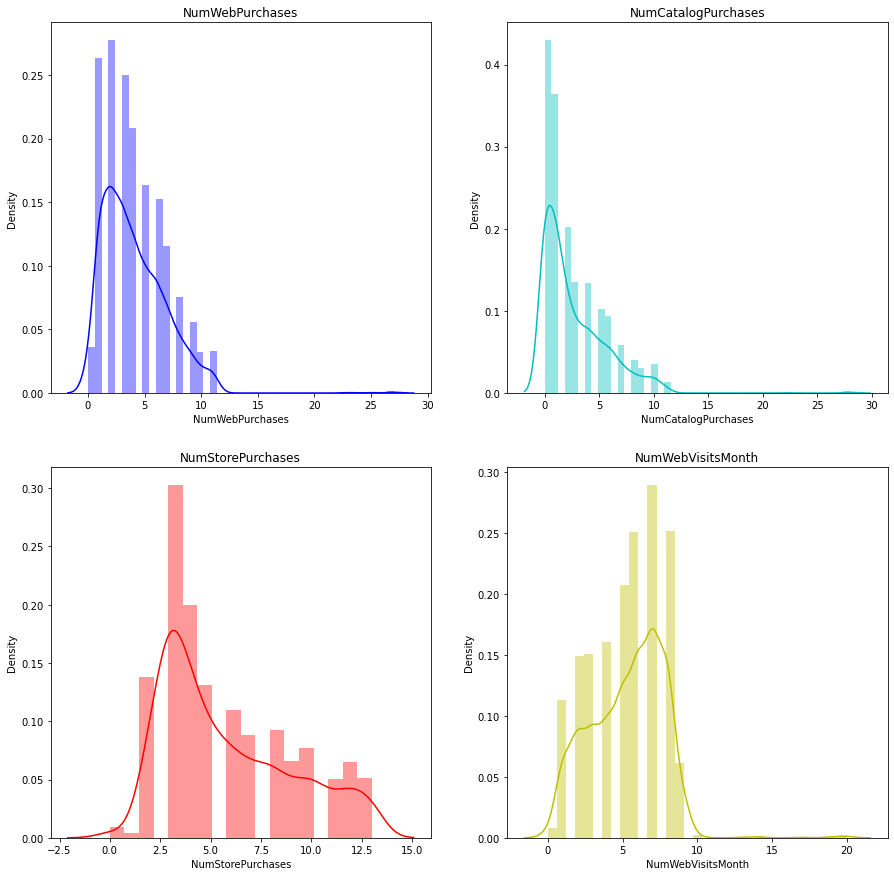

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [7]:
#Libraries import
import matplotlib.pyplot as plt
import seaborn as sns

data_used_plot1 = "data0" #Dataframe used
for k,l in zip(range(4,32,4),range(0,28,4)):
    f=plt.figure(figsize=(15,15)) #Set plot size
    for i,j,c in zip([1,2,3,4],numeric_variables[l:k],["b","c","r",'y']):
        ni = str(i)
        variable = "v"+ni
        exec(variable+"='"+j+"'")
        exec("ax"+ni+"=f.add_subplot("+str(i+220)+")")
        exec("sns.distplot("+data_used_plot1+".loc[:,"+variable+"].dropna(),color='"+c+"',ax=ax"+ni+")")
        exec("ax"+str(i)+".set_title("+variable+")")


0


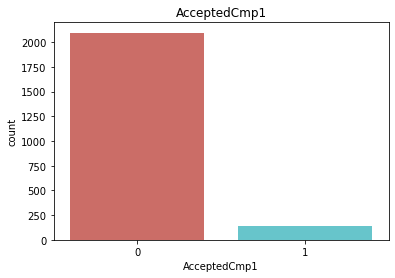

1


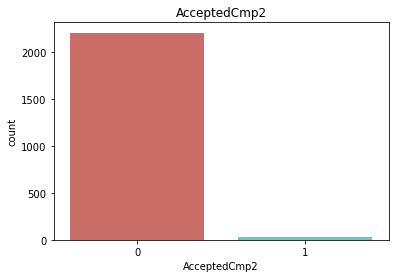

2


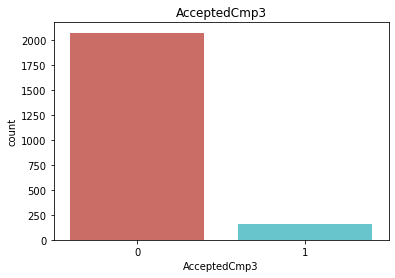

3


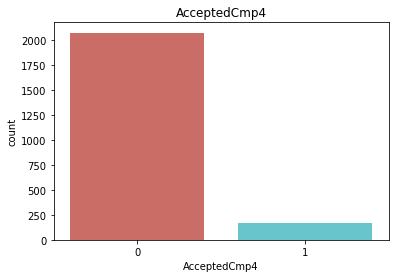

4


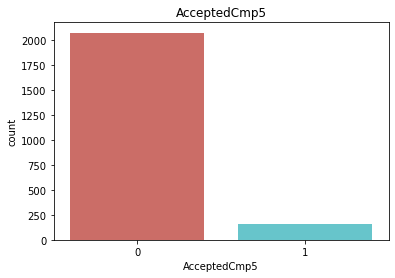

5


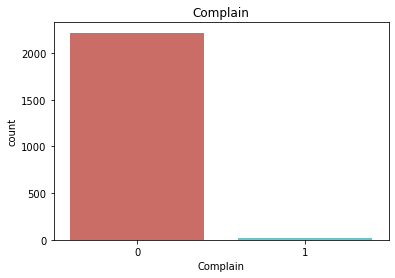

In [8]:
#Categorical numeric variable distribution plots

for i in range(len(numeric_categorial_variables)):
    print(i)
    sns.countplot(x=numeric_categorial_variables[i],data= data0, palette = 'hls')
    plt.savefig('count_plot')
    plt.title(eval("numeric_categorial_variables["+str(i)+"]"))
    plot1 = plt.show()

In [9]:
#Numeric categorial variables ratio count
for i in range(len(total_categoricals)):
    count = df([data0[total_categoricals[i]].value_counts()])
    display(count)

,Graduation,PhD,Master,2n Cycle,Basic
Education,1127,486,370,203,54


,Married,Together,Single,Divorced,Widow,Alone,Absurd,YOLO
Marital_Status,864,580,480,232,77,3,2,2


,0,1
AcceptedCmp1,2096,144


,0,1
AcceptedCmp2,2210,30


,0,1
AcceptedCmp3,2077,163


,0,1
AcceptedCmp4,2073,167


,0,1
AcceptedCmp5,2077,163


,0,1
Complain,2219,21


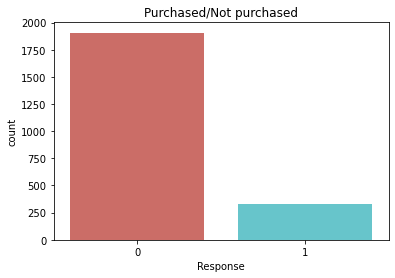

,0,1
Response,1906,334


'Proporción response'

,0,1
Response,85.089286,14.910714


In [10]:
#Response variable plot
sns.countplot(x='Response',data= data0, palette = 'hls')
plt.savefig('count_plot')
plt.title("Purchased/Not purchased")
plot1 = plt.show()
display(df([data0["Response"].value_counts()]))
display("Proporción response",df([data0["Response"].value_counts()])*100/df([data0["Response"].value_counts()]).sum(axis=1)[0])

In [11]:
#Mean of the data according whether they responded or not to the campaign
display("Media",data0[list(numeric_variables )+["Response"]].groupby('Response').mean())
#Median of the data according whether they responded or not to the campaign
display("Mediana",data0[list(numeric_variables )+["Response"]].groupby('Response').median())

'Media'

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Response,,,,,,,,,,,,,,,,
0,1968.698846,50839.132767,0.462225,0.541448,51.514690,269.104407,24.216684,144.624344,34.980063,25.035152,40.968520,2.323190,3.911857,2.391920,5.736621,5.320567
1,1969.416168,60209.675676,0.341317,0.305389,35.383234,502.703593,38.203593,294.353293,52.050898,38.634731,61.446108,2.335329,5.071856,4.203593,6.095808,5.293413


'Mediana'

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Response,,,,,,,,,,,,,,,,
0,1970.0,50150.0,0.0,1.0,52.0,152.0,7.0,56.0,11.0,7.0,21.0,2.0,3.0,1.0,5.0,6.0
1,1971.0,64090.0,0.0,0.0,30.0,448.0,21.0,174.5,25.0,20.0,39.5,1.0,5.0,4.0,6.0,6.0


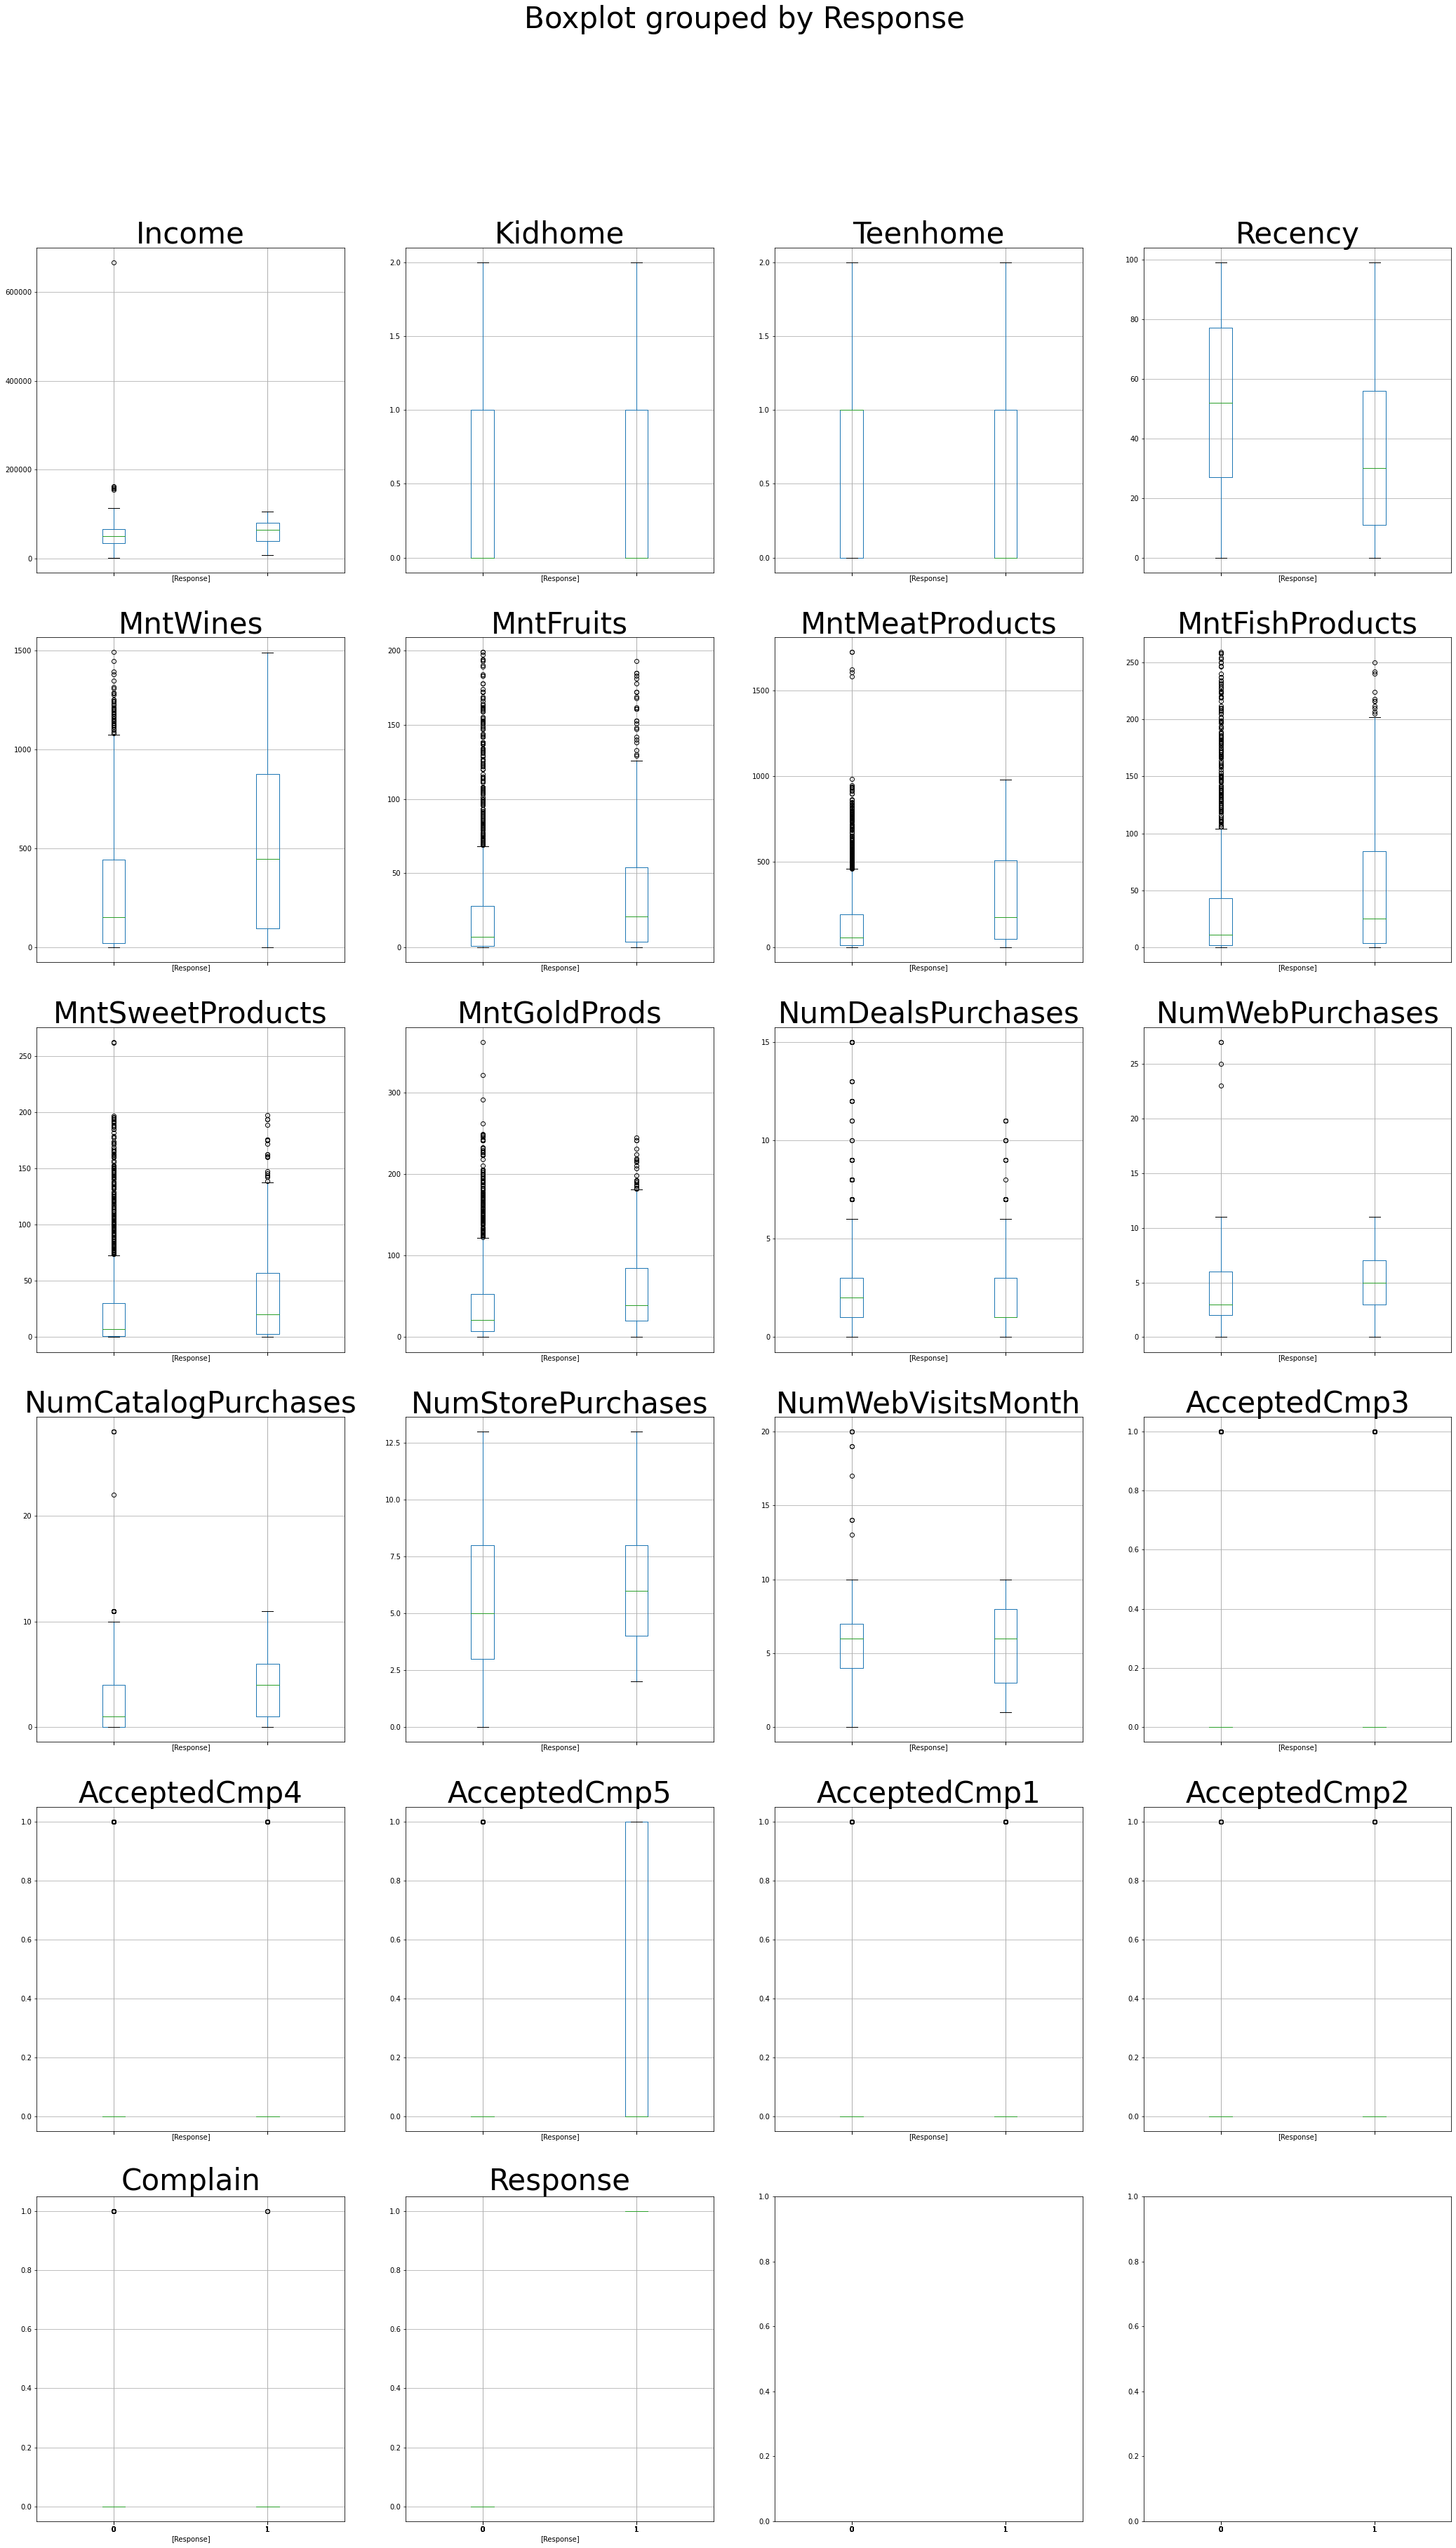

In [12]:
#Numeric vs response variable Boxplot

figure, axs = plt.subplots(6,4, sharey=False, sharex=True, figsize=(35,60))
plt.rcParams.update({'font.size': 35})

#Not to use this variables
data_to_plot1 = data0.drop([index_variable]+
                            list(irrelevant_variables)+
                            list(text_categorical_variables)+
                            [date_variable],axis=1)

columns_to_a_plot1 = data_to_plot1.columns.to_list()

index = 1
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        try:
            boxplot = data_to_plot1.boxplot(column=[columns_to_a_plot1[index]], 
                                            return_type='axes', 
                                            by=['Response'], 
                                            ax=axs[i][j]) 
            index += 1
        except IndexError:
            pass

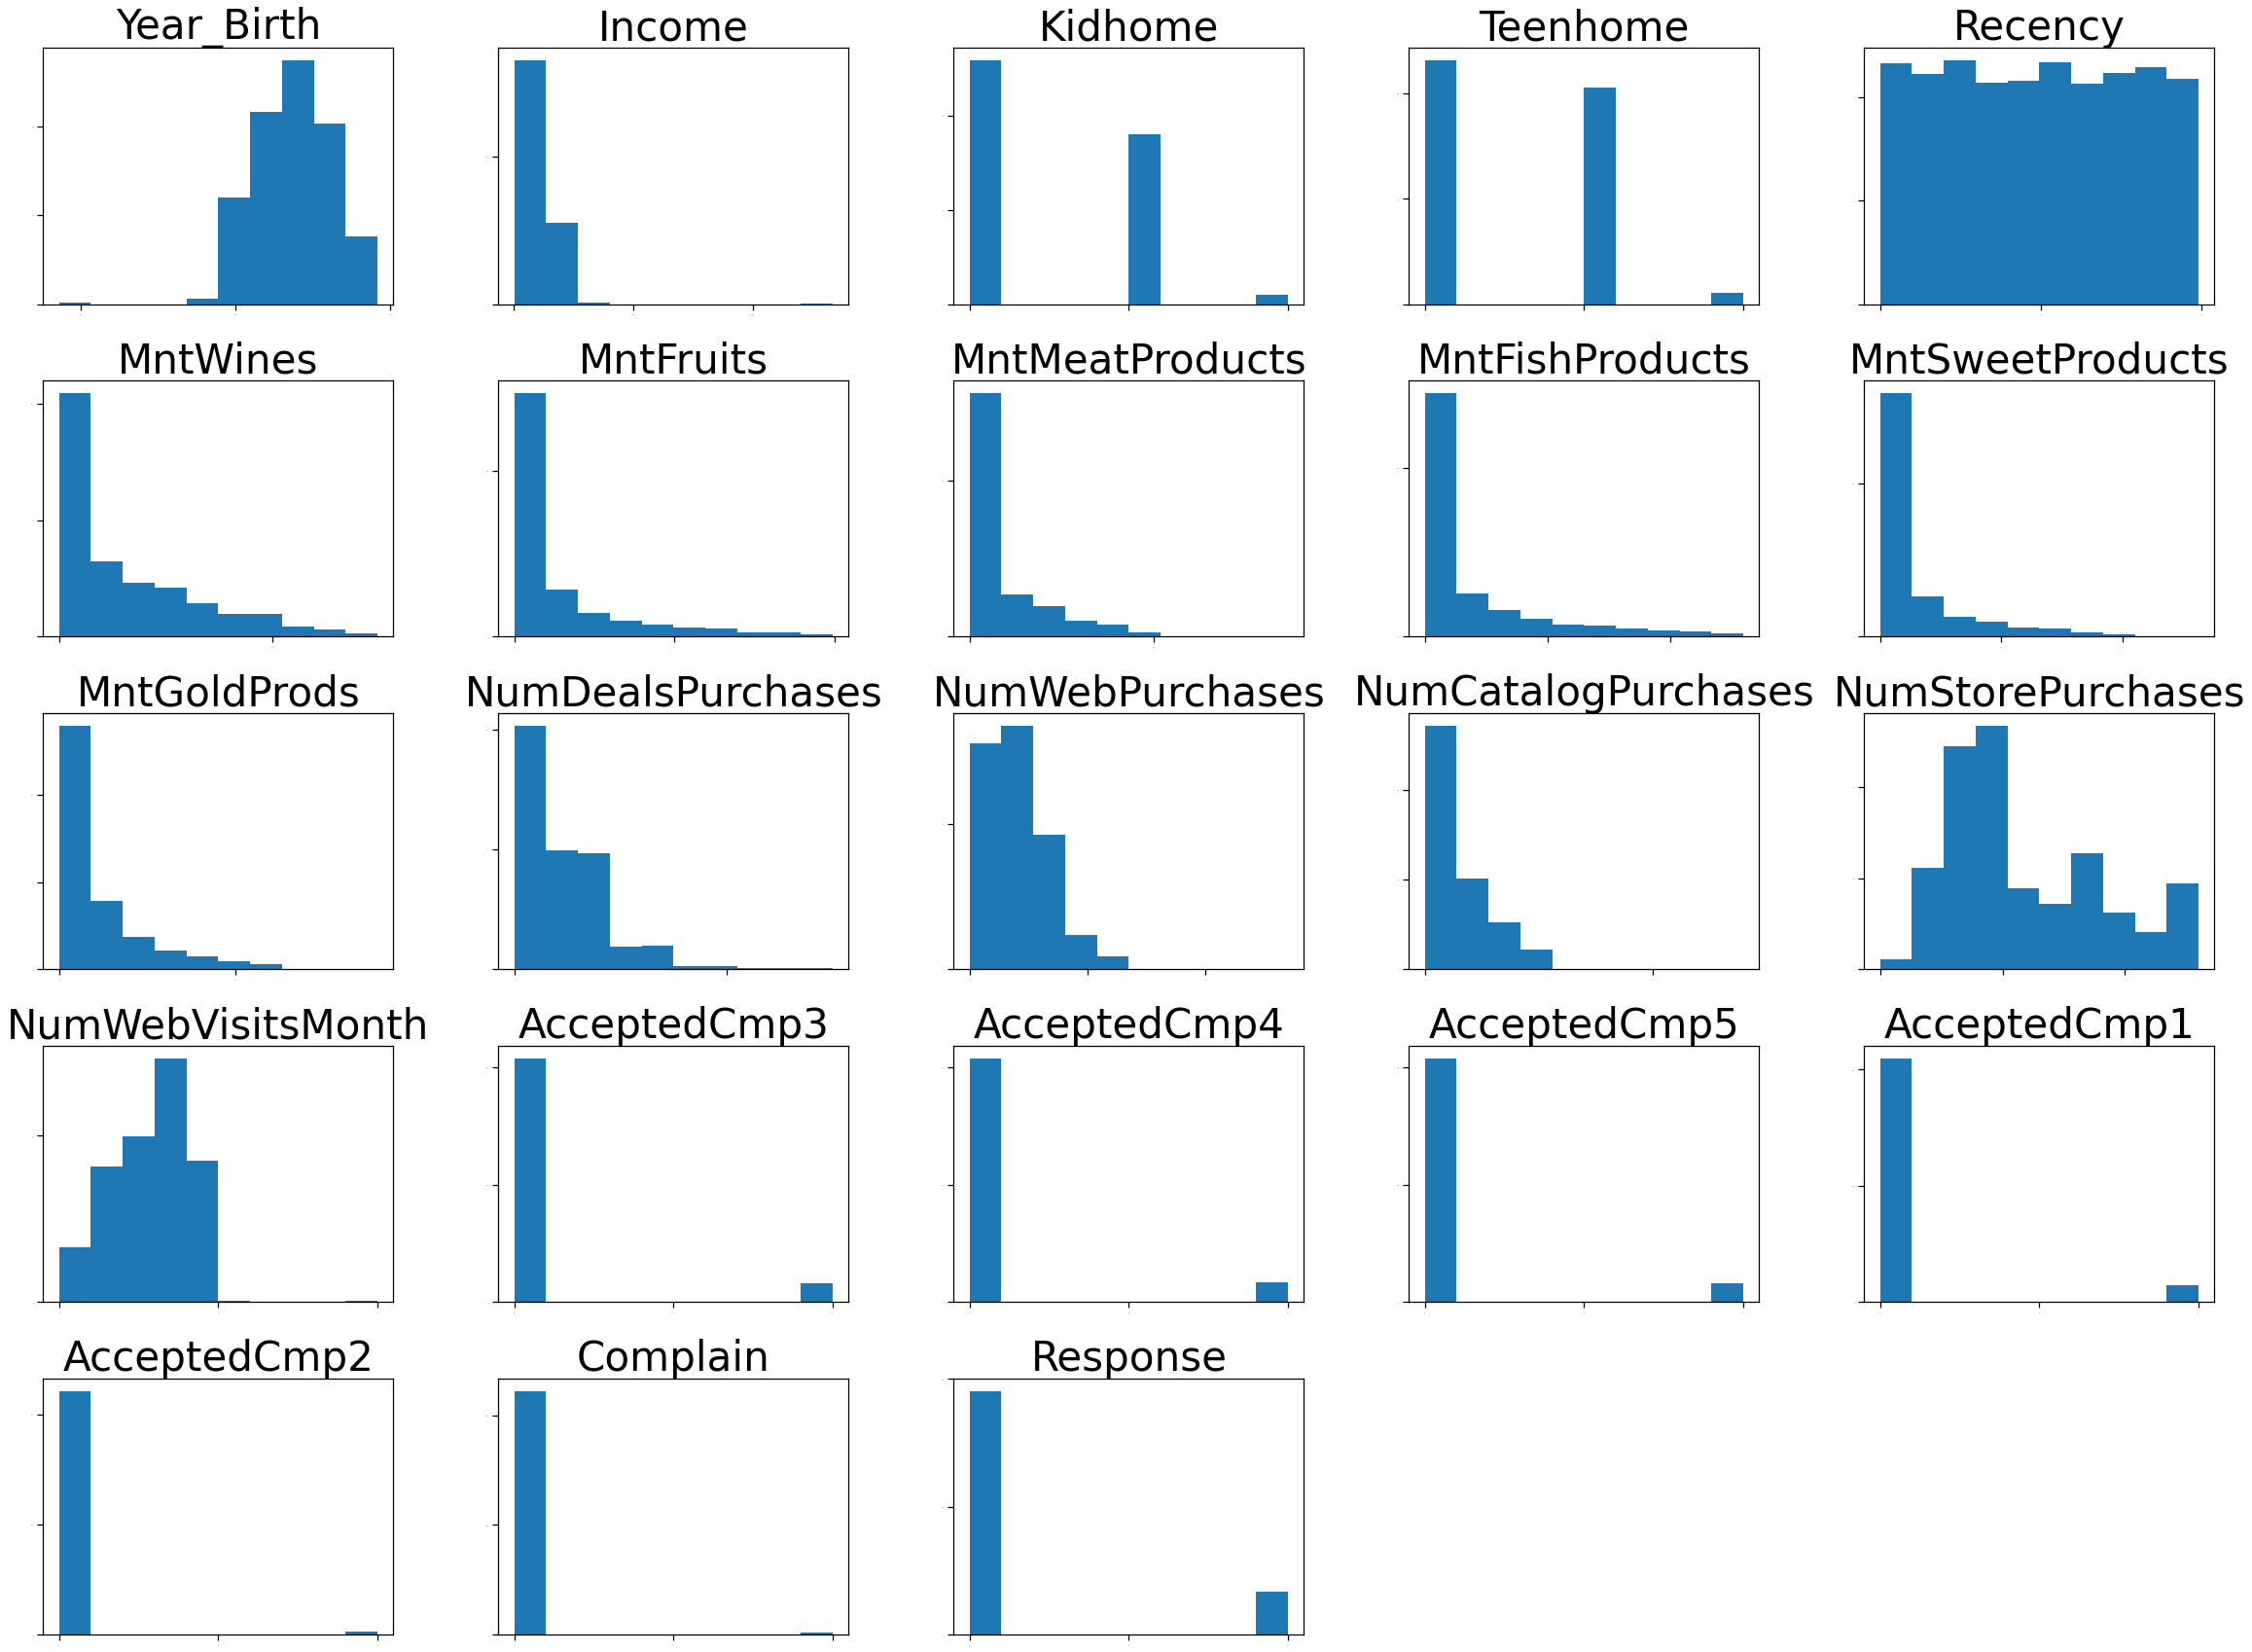

In [13]:
#Numeric variables histogram 

sns.set_context("notebook", font_scale=3.5,rc={"lines.linewidth": 2.5}) #Set plot size
x_subset = data_to_plot1[columns_to_a_plot1]
x_subset.hist(grid=False, xlabelsize=0.5, ylabelsize=0.5, figsize=(40,30));

In [14]:
#Correlation matrix between numerical variables

data_correlation_matrix = data0[[response_variable]+
                                list(numeric_variables)+
                                list(numeric_categorial_variables)] 
corr = data_correlation_matrix.corr()
corr.style.background_gradient(cmap='coolwarm')

,Response,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain
Response,1.000000,0.021325,0.133047,-0.080008,-0.154446,-0.198437,0.247254,0.125289,0.236335,0.111331,0.117372,0.139850,0.002238,0.148730,0.220810,0.039363,-0.003987,0.293982,0.169293,0.254258,0.177019,0.326634,-0.001707
Year_Birth,0.021325,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818,-0.060846,-0.145040,-0.121275,-0.128272,0.121139,-0.005930,-0.006539,0.061774,-0.060510,0.007123,-0.030128
Income,0.133047,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,0.589162,0.529362,-0.553088,0.276820,0.087545,-0.016174,0.184400,0.335943,-0.027225
Kidhome,-0.080008,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,-0.172339,-0.081716,0.014674,-0.161600,-0.205634,0.040207
Teenhome,-0.154446,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,-0.140090,-0.015605,-0.042677,0.038886,-0.191050,0.003138
Recency,-0.198437,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,-0.019283,-0.001781,-0.032991,0.018826,0.000129,0.013231
MntWines,0.247254,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,0.354133,0.205907,0.062202,0.373286,0.472613,-0.039007
MntFruits,0.125289,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.194748,-0.009773,0.014727,0.010152,0.215833,-0.005166
MntMeatProducts,0.236335,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,0.309761,0.043033,0.018272,0.102912,0.373769,-0.023483
MntFishProducts,0.111331,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,0.260762,0.002577,0.000357,0.016843,0.199578,-0.020953


### Check if there is missing data

In [15]:
print(data0.shape[0],data0.dropna().shape[0],
      "\nIt can be observed that there are "+
      str(data0.shape[0]-data0.dropna().shape[0])+
      " missing values in any variable as shapes do not match")

2240 2216 
It can be observed that there are 24 missing values in any variable as shapes do not match


In [16]:
#Dataframe creation to check in what variables there are missing values
missing_values =  df([data0[i].shape[0]-data0[i].dropna().shape[0] for i in data0.columns.tolist()],
                  index=[i for i in data0.columns.tolist()],columns=["Number of empty records"])  
display(missing_values[missing_values["Number of empty records"]!=0])
print("The conclusion is that all 24 missing values belongs to variable Income")

,Number of empty records
Income,24


The conclusion is that all 24 missing values belongs to variable Income


### Missing data handling

In [17]:
#Missing values are filled with income mean not to afect data
data0["Income"] = data0["Income"].fillna(data0["Income"].mean()) 

### Conversion of categorical variables to Dummies

In [18]:
types_of_variables 

['index_variable',
 'irrelevant_variables',
 'numeric_variables',
 'text_categorical_variables',
 'numeric_categorial_variables',
 'total_categoricals',
 'date_variable',
 'response_variable']

In [19]:
#Data with converted categorical variables
data1 = pd.get_dummies(data0,columns=list(text_categorical_variables ))

### Data transformation

In [20]:
data = data1.set_index("ID").sort_index()

In [21]:
#Libraries import
import numpy as np

##Variable transformation date to convert the date variable to days accodring to the day done this code
data["todays date"] =  np.repeat(pd.to_datetime(["9/8/2021"],format= "%d/%m/%Y"),data.shape[0])
#Calculation of date difference in days
data["Dt_Customer"] = pd.to_datetime(data['Dt_Customer']) #Dt_Customer conversion to date
data['enrollment days'] =  data ['todays date'] - data [ 'Dt_Customer'] 
data ['enrollment days'] = data ['enrollment days']  /  np.timedelta64 (1, 'D')
data=data.drop(["Dt_Customer","todays date"],axis=1)
data=data.astype({"enrollment days":"int"})

In [22]:
data_columns = ['Year_Birth','enrollment days','Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Education_2n Cycle','Education_Basic','Education_Graduation','Education_Master','Education_PhD','Marital_Status_Absurd','Marital_Status_Alone','Marital_Status_Divorced','Marital_Status_Married','Marital_Status_Single','Marital_Status_Together','Marital_Status_Widow','Marital_Status_YOLO','Response']
data_columns_description = ["Birth year","Days since enrollment","Income","Toddlers at home","Teenagers at home","Number of days since last purchase",'Amount spent on wines in the last 2 years','Amount spent on fruit in the last 2 years','Amount spent on meat in the last 2 years','Amount spent on fish in the last 2 years','Amount spent on sweets in the last 2 years' ,'Amount spent on gold in the last 2 years',"Number of purchases made at a discount","Number of purchases made through the company's website","Number of purchases made through a catalogue","Number of purchases made in the physical store","Number of visits made to the company's website in the last month",'If you accepted the offer in campaign number 1','If you accepted the offer in campaign number 2','If you accepted the offer in campaign number 3','If you accepted the offer in campaign number 4','If you accepted the offer in campaign number 5',"If you have filed complaints","If you have a graduate degree","If you have an education basic","If you have a bachelor's degree","If you have a master's degree","If you have a doctorate","If you have an absurd marital status","If you have a single marital status","If you have a divorced marital status","If you have married marital status","If you have a single marital status","If you have a civil union marital status","If you have a widowed marital status","If you have a YOLO marital status","Response"] 
data = data[data_columns]

In [23]:
pd.set_option('display.max_columns',200) #Set pandas to show more columns
pd.set_option('display.max_colwidth',100) #Set pandas to show more characters per column
columns_description = df([data_columns,data_columns_description],index=["Variable","Description"],columns=range(1,38)).T
columns_description

,Variable,Description
1,Year_Birth,Birth year
2,enrollment days,Days since enrollment
3,Income,Income
4,Kidhome,Toddlers at home
5,Teenhome,Teenagers at home
6,Recency,Number of days since last purchase
7,MntWines,Amount spent on wines in the last 2 years
8,MntFruits,Amount spent on fruit in the last 2 years
9,MntMeatProducts,Amount spent on meat in the last 2 years
10,MntFishProducts,Amount spent on fish in the last 2 years


### Data Split

In [24]:
#Libraries import
from sklearn.model_selection import train_test_split
#Train and test
test_size = 0.36
train, test = train_test_split(data, test_size=test_size, random_state=99)
#Validation
validation, test = train_test_split(test, test_size=0.5, random_state=99)

In [25]:
Xtrain = train.drop("Response", axis = 1)
Ytrain = train[["Response"]]
Xtest = test.drop("Response", axis = 1)
Ytest = test[["Response"]]
Xvalidation = validation.drop("Response", axis = 1)
Yvalidation = validation[["Response"]]

In [26]:
#Saving X and Y indeces and columns
ColumnsX = Xtrain.columns.tolist() 
IndexXtrain = Xtrain.index.tolist()
IndexXtest = Xtest.index.tolist()
IndexXvalidation = Xvalidation.index.tolist()

### Data Standardizing 

In [27]:
#Libraries import
from sklearn import preprocessing

Activate_standarization = True #Activate o deactivate standarization
if Activate_standarization is True:
    Xtrain = preprocessing.scale(Xtrain)
    Xtest = preprocessing.scale(Xtest)
    Xvalidación = preprocessing.scale(Xvalidation)
else:
    pass

In [28]:
#Apply standarization if activated
Xtrain = df(Xtrain,index=IndexXtrain,columns=ColumnsX)
Xtest = df(Xtest,index=IndexXtest,columns=ColumnsX)
Xvalidación = df(Xvalidation,index=IndexXvalidation,columns=ColumnsX)

### Feature Selection

In [29]:
#Libraries import
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
sele = RFECV(estimator=LogisticRegression(solver='liblinear'), cv=5, scoring='accuracy')
sele.fit(Xtrain, Ytrain)

RFECV(cv=5, estimator=LogisticRegression(solver='liblinear'),
      scoring='accuracy')

In [30]:
#List creation with selected variables
selected_variables = list(Xtrain.columns[(sele.get_support())])

In [31]:
print("There are altogether " +str(len(selected_variables)) +" selected variables and are\n")
print(selected_variables)

There are altogether 12 selected variables and are

['enrollment days', 'Teenhome', 'Recency', 'MntMeatProducts', 'NumCatalogPurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Education_PhD', 'Marital_Status_Married', 'Marital_Status_Together']


### Lasso Regularization

In [32]:
#Libraries import
from sklearn.feature_selection import SelectFromModel
sele2 = SelectFromModel(LogisticRegression(penalty='l1', solver='saga'))
RLasso = sele2.fit(Xtrain, Ytrain)

In [33]:
#List with selected variables
selected_variables_lasso = list(Xtrain.columns[(sele2.get_support())])

print('Total Variables: {}'.format((Xtrain.shape[1])))
print('Selected variables: {}'.format(len(selected_variables_lasso)))
print('Variables with coeficients rediced to zero: {}'.format(np.sum(sele2.estimator_.coef_ == 0)))

Total Variables: 36
Selected variables: 35
Variables with coeficients rediced to zero: 1


In [34]:
print("There are altogether " +str(len(selected_variables_lasso)) +" selected variables by Lasso and are\n")
print(selected_variables_lasso)

There are altogether 35 selected variables by Lasso and are

['Year_Birth', 'enrollment days', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Education_2n Cycle', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Marital_Status_Absurd', 'Marital_Status_Alone', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow', 'Marital_Status_YOLO']


### Grid Search

In [35]:
#Libraries import
from sklearn.tree import DecisionTreeClassifier as tree
from sklearn.ensemble import RandomForestClassifier as forest
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.svm import SVC

#Dictionary of models to do a Grid Search
#Dictionary structure
#Name to type: {"model": model function, "Parameters: {"Parameter1":[],"Parameter2":[]}"

#LinearRegression, LogisticRegression, Ridge, Lasso,tree,forest
grid_search_dictionary = {
            'Logistic Regression' : {
                    'Model' : LogisticRegression(solver = 'saga'),
                    'Parameter' : {'penalty' : ('l1','l2','elasticnet','none'),
                                'C': [0.5,1,1.5,2],
                                'l1_ratio':[0.2,0.5,0.8],
                                "random_state":[99]}},
           'Decision tree': {
                   'Model': tree(),
                   'Parameter':{'max_depth': [None, 2,4,6,8],
                            'min_samples_leaf':[1,3,5,8],
                            "random_state":[99]}},
        'Random forest' : {
                    'Model' : forest(),
                    'Parameter' : {'max_depth' :[None, 2,4,6],
                            'min_samples_leaf':[1,5,6,8],
                            'n_estimators':[20,50,100,150,200],
                            "random_state":[99]}},
        'Knn' : {
                    'Model' : knnc(),
                    'Parameter' : {'n_neighbors' :[5, 10, 15]}},    
        'Ridge' : {
                    'Model' : RidgeClassifier(),
                    'Parameter' : {'alpha' :[-0.5,0.01,0.1,0.3,0.5,0.7,1,2,5, 10, 15],
                                   "random_state":[99]}},
        'SVM' : {
                    'Model' : SVC(),
                    'Parameter' : {'C' :[0.001,0.1,0.3,0.5,0.7,1,1.6,2,2.4,5, 10, 15],
                                   "kernel" :['linear', 'poly', 'rbf', 'sigmoid'], 
                                   "random_state":[99]}},
        
    } 

In [36]:
df(grid_search_dictionary).T

,Model,Parameter
Logistic Regression,LogisticRegression(solver='saga'),"{'penalty': ('l1', 'l2', 'elasticnet', 'none'), 'C': [0.5, 1, 1.5, 2], 'l1_ratio': [0.2, 0.5, 0...."
Decision tree,DecisionTreeClassifier(),"{'max_depth': [None, 2, 4, 6, 8], 'min_samples_leaf': [1, 3, 5, 8], 'random_state': [99]}"
Random forest,RandomForestClassifier(),"{'max_depth': [None, 2, 4, 6], 'min_samples_leaf': [1, 5, 6, 8], 'n_estimators': [20, 50, 100, 1..."
Knn,KNeighborsClassifier(),"{'n_neighbors': [5, 10, 15]}"
Ridge,RidgeClassifier(),"{'alpha': [-0.5, 0.01, 0.1, 0.3, 0.5, 0.7, 1, 2, 5, 10, 15], 'random_state': [99]}"
SVM,SVC(),"{'C': [0.001, 0.1, 0.3, 0.5, 0.7, 1, 1.6, 2, 2.4, 5, 10, 15], 'kernel': ['linear', 'poly', 'rbf'..."


In [37]:
#Libraries import
import datetime as dat
from sklearn.model_selection import GridSearchCV

#Estimated execution time: 2:00
start = dat.datetime.now()
scores = []
for name_model, mp in grid_search_dictionary.items ():
    clf = GridSearchCV (mp[ 'Model'], mp['Parameter'], cv=5,)
    clf.fit(Xtrain, Ytrain) 
    scores.append({
    'Model': name_model,
    'Best score': clf.best_score_,
    'Best parameters': clf.best_params_})
end=dat.datetime.now()
print("Execution time: {}".format(end-start))

Execution time: 0:01:49.580390


In [38]:
#Best parameters of the models in grid search
grid_search_best_models = df(scores,columns=["Model","Best score",'Best parameters'])
grid_search_best_models.sort_values(by=["Best score"],ascending=False)

,Model,Best score,Best parameters
5,SVM,0.891823,"{'C': 2, 'kernel': 'rbf', 'random_state': 99}"
0,Logistic Regression,0.884162,"{'C': 1, 'l1_ratio': 0.2, 'penalty': 'l1', 'random_state': 99}"
4,Ridge,0.883460,"{'alpha': -0.5, 'random_state': 99}"
2,Random forest,0.882764,"{'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100, 'random_state': 99}"
1,Decision tree,0.871606,"{'max_depth': 2, 'min_samples_leaf': 1, 'random_state': 99}"
3,Knn,0.869501,{'n_neighbors': 15}


Logistic Regression

In [39]:
#Libraries import
from datetime import datetime as date
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score#,roc_curve

##Logistic Regression
#Estimated execution time: 0:30
#Logistic regression set up variables
start=date.now()

C_log_reg = np.arange(0.7,1.3,0.02)
L1_ratio_log_reg = np.arange(0.1,0.3,0.02)
coefs_log_reg = df()
matrices_conf_log_reg = df()
accuracys_log_reg = df()
presicions_log_reg = df()
recalls_log_reg = df()
specificities_log_reg = df()
roc_aucs_log_reg = df()
F1s_log_reg = df()
Ys_estimated_log_reg = df()
indices_log_reg = np.array([])

for c in C_log_reg:
    for l in L1_ratio_log_reg:
        index_log_reg = [(str("C: "+str(c) + str(" L1 Ratio: "+str(l))))] 
        indices_log_reg = np.append(indices_log_reg,index_log_reg)
        #Model
        log_reg = LogisticRegression(C = c, l1_ratio = l, penalty = "l1",solver="saga", random_state = 99).fit(Xtrain,Ytrain)
        Y_estimated_log_reg = df(log_reg.predict(Xtest), columns = index_log_reg)
        Ys_estimated_log_reg = pd.concat([Ys_estimated_log_reg,df(Y_estimated_log_reg).T],axis=0) 
        coef_log_reg = df(log_reg.coef_)
        coefs_log_reg = pd.concat([coefs_log_reg,coef_log_reg], ignore_index=True) 
        conf_matrix_log_reg = df([confusion_matrix(Ytest,Y_estimated_log_reg).ravel()],columns=["TN","FP","FN","TP"])
        tn,fp,fn,tp = confusion_matrix(Ytest,Y_estimated_log_reg).ravel() #Confusion matrix metrics
        matrices_conf_log_reg = pd.concat([matrices_conf_log_reg,conf_matrix_log_reg]).set_index(pd.Series(indices_log_reg)) 
        accuracy_log_reg = df([accuracy_score(Ytest,Y_estimated_log_reg)],columns=["Accuracy Logistic Regression"]) 
        accuracys_log_reg = pd.concat([accuracys_log_reg,accuracy_log_reg]).set_index(pd.Series(indices_log_reg)) 
        presicion_log_reg = df([precision_score(Ytest,Y_estimated_log_reg)],columns=["Precision Logistic Regression"]) 
        presicions_log_reg = pd.concat([presicions_log_reg,presicion_log_reg]).set_index(pd.Series(indices_log_reg))
        recall_log_reg = df([recall_score(Ytest,Y_estimated_log_reg)],columns=["Recall Logistic Regression"]) 
        recalls_log_reg = pd.concat([recalls_log_reg,recall_log_reg]).set_index(pd.Series(indices_log_reg))  
        specificity_log_reg = df([tn /float(tn+fp)])
        specificities_log_reg = pd.concat([specificity_log_reg,specificities_log_reg]).set_index(pd.Series(indices_log_reg)) 
        roc_auc_log_reg = df([roc_auc_score(Ytest,Y_estimated_log_reg)],columns=["AUC Score Logistic"]) 
        roc_aucs_log_reg = pd.concat([roc_aucs_log_reg,roc_auc_log_reg]).set_index(pd.Series(indices_log_reg))
        F1_log_reg = df([accuracy_score(Ytest,Y_estimated_log_reg)],columns=["F1 Score Logistic Regression"]) 
        F1s_log_reg = pd.concat([F1s_log_reg,F1_log_reg]).set_index(pd.Series(indices_log_reg)) 
Ys_estimated_log_reg = df(Ys_estimated_log_reg.T.set_index(Ytest.index)).T
coefs_log_reg.columns = Xtrain.columns.values
coefs_log_reg.index =indices_log_reg  
end=date.now()
print(end-start)

0:00:34.199999


Decision Tree

In [40]:
##Decision Tree
##Estimated execution time: 0:10
##Decision tree set up variables
start=date.now()
depth_tree = [None,1,2,3,5]
leaf_tree = [1,2,3,4]
#trees has no coeficient
#coefs_tree = df()
matrices_conf_tree = df()
accuracys_tree = df()
presicions_tree = df()
recalls_tree = df()
specificities_tree = df()
roc_aucs_tree = df()
F1s_tree = df()
Ys_estimated_tree = df()
indices_tree = np.array([])

for d in depth_tree:
    for l in leaf_tree:
        index_tree = [(str("depth: "+str(d) + str(" leaf: "+str(l))))] 
        indices_tree = np.append(indices_tree,index_tree)
        #Model
        Model_tree = tree(max_depth = d, min_samples_leaf = l, random_state = 99).fit(Xtrain,Ytrain)
        Y_estimated_tree = df(Model_tree.predict(Xtest), columns = index_tree)
        Ys_estimated_tree = pd.concat([Ys_estimated_tree,df(Y_estimated_tree).T],axis=0) 
        #trees has no coeficient
        #coef_tree = df(tree.coef_)
        #coefs_tree = pd.concat([coefs_tree,coef_tree], ignore_index=True) 
        conf_matrix_tree = df([confusion_matrix(Ytest,Y_estimated_tree).ravel()],columns=["TN","FP","FN","TP"])
        tn,fp,fn,tp = confusion_matrix(Ytest,Y_estimated_tree).ravel() #Confusion matrix metrics
        matrices_conf_tree = pd.concat([matrices_conf_tree,conf_matrix_tree]).set_index(pd.Series(indices_tree)) 
        accuracy_tree = df([accuracy_score(Ytest,Y_estimated_tree)],columns=["Accuracy Decision Tree"]) 
        accuracys_tree = pd.concat([accuracys_tree,accuracy_tree]).set_index(pd.Series(indices_tree)) 
        presicion_tree = df([precision_score(Ytest,Y_estimated_tree)],columns=["Precision Decision Tree"]) 
        presicions_tree = pd.concat([presicions_tree,presicion_tree]).set_index(pd.Series(indices_tree))
        recall_tree = df([recall_score(Ytest,Y_estimated_tree)],columns=["Recall Decision Tree"]) 
        recalls_tree = pd.concat([recalls_tree,recall_tree]).set_index(pd.Series(indices_tree))  
        specificity_tree = df([tn /float(tn+fp)])
        specificities_tree = pd.concat([specificity_tree,specificities_tree]).set_index(pd.Series(indices_tree)) 
        roc_auc_tree = df([roc_auc_score(Ytest,Y_estimated_tree)],columns=["AUC Score Decision Tree"]) 
        roc_aucs_tree = pd.concat([roc_aucs_tree,roc_auc_tree]).set_index(pd.Series(indices_tree))
        F1_tree = df([accuracy_score(Ytest,Y_estimated_tree)],columns=["F1 Score Decision Tree"]) 
        F1s_tree = pd.concat([F1s_tree,F1_tree]).set_index(pd.Series(indices_tree)) 
Ys_estimated_tree = df(Ys_estimated_tree.T.set_index(Ytest.index)).T
#trees has no coeficient
#coefs_tree.columns = Xtrain.columns.values
#coefs_tree.index =indices_tree  
end=date.now()
print(end-start)


0:00:00.430924


Random Forest

In [41]:
##Random Forest
##Estimated execution time: 0:30
##Random Forest set up variables
start=date.now()
depth_forest = [None,1,2,3,5]
leaf_forest = [1,2,3,4]
trees_forest = [50,80,90,100,110,120]
#Forest has no coeficient
#coefs_forest = df()
matrices_conf_forest = df()
accuracys_forest = df()
presicions_forest = df()
recalls_forest = df()
specificities_forest = df()
roc_aucs_forest = df()
F1s_forest = df()
Ys_estimated_forest = df()
indices_forest = np.array([])

for d in depth_forest:
    for l in leaf_forest:
        for t in trees_forest:                            
            index_forest = [(str("trees: "+str(t) +"depth: "+str(d) + str(" leaf: "+str(l))))] 
            indices_forest = np.append(indices_forest,index_forest)
            #Model
            Model_forest = forest(max_depth = d, min_samples_leaf = l, n_estimators=t, random_state = 99).fit(Xtrain,Ytrain)
            Y_estimated_forest = df(Model_forest.predict(Xtest), columns = index_forest)
            Ys_estimated_forest = pd.concat([Ys_estimated_forest,df(Y_estimated_forest).T],axis=0) 
            #Forest has no coeficient
            #coef_forest = df(forest.coef_)
            #coefs_forest = pd.concat([coefs_forest,coef_forest], ignore_index=True) 
            conf_matrix_forest = df([confusion_matrix(Ytest,Y_estimated_forest).ravel()],columns=["TN","FP","FN","TP"])
            tn,fp,fn,tp = confusion_matrix(Ytest,Y_estimated_forest).ravel() #Confusion matrix metrics
            matrices_conf_forest = pd.concat([matrices_conf_forest,conf_matrix_forest]).set_index(pd.Series(indices_forest)) 
            accuracy_forest = df([accuracy_score(Ytest,Y_estimated_forest)],columns=["Accuracy Random Forest"]) 
            accuracys_forest = pd.concat([accuracys_forest,accuracy_forest]).set_index(pd.Series(indices_forest)) 
            presicion_forest = df([precision_score(Ytest,Y_estimated_forest)],columns=["Precision Random Forest"]) 
            presicions_forest = pd.concat([presicions_forest,presicion_forest]).set_index(pd.Series(indices_forest))
            recall_forest = df([recall_score(Ytest,Y_estimated_forest)],columns=["Recall Random Forest"]) 
            recalls_forest = pd.concat([recalls_forest,recall_forest]).set_index(pd.Series(indices_forest))  
            specificity_forest = df([tn /float(tn+fp)])
            specificities_forest = pd.concat([specificity_forest,specificities_forest]).set_index(pd.Series(indices_forest)) 
            roc_auc_forest = df([roc_auc_score(Ytest,Y_estimated_forest)],columns=["AUC Score Random Forest"]) 
            roc_aucs_forest = pd.concat([roc_aucs_forest,roc_auc_forest]).set_index(pd.Series(indices_forest))
            F1_forest = df([accuracy_score(Ytest,Y_estimated_forest)],columns=["F1 Score Random Forest"]) 
            F1s_forest = pd.concat([F1s_forest,F1_forest]).set_index(pd.Series(indices_forest)) 
Ys_estimated_forest = df(Ys_estimated_forest.T.set_index(Ytest.index)).T
#Forest has no coeficient
#coefs_forest.columns = Xtrain.columns.values
#coefs_forest.index =indices_forest  
end=date.now()
print(end-start)

0:00:23.640432


Knn

In [42]:
##K nearest neighbors
##Estimated execution time: 0:10
##K nearest neighbors set up variables
start=date.now()
neighbors = [6,9,13,14,15,16,17,20,24]
#Knn has no coeficients
#coefs_knn = df()
matrices_conf_knn = df()
accuracys_knn = df()
presicions_knn = df()
recalls_knn = df()
specificities_knn = df()
roc_aucs_knn = df()
F1s_knn = df()
Ys_estimated_knn = df()
indices_knn = np.array([])

for n in neighbors:
    index_knn = [(str("K-Neighbors: "+str(n) ))] 
    indices_knn = np.append(indices_knn,index_knn)
    #Model
    knn = knnc(n_neighbors = n).fit(Xtrain,Ytrain)
    Y_estimated_knn = df(knn.predict(Xtest), columns = index_knn)
    Ys_estimated_knn = pd.concat([Ys_estimated_knn,df(Y_estimated_knn).T],axis=0) 
    #Knn no tiene coeficientes
    #coef_knn = df(knn.coef_)
    #coefs_knn = pd.concat([coefs_knn,coef_knn], ignore_index=True) 
    conf_matrix_knn = df([confusion_matrix(Ytest,Y_estimated_knn).ravel()],columns=["TN","FP","FN","TP"])
    tn,fp,fn,tp = confusion_matrix(Ytest,Y_estimated_knn).ravel() #Confusion matrix metrics
    matrices_conf_knn = pd.concat([matrices_conf_knn,conf_matrix_knn]).set_index(pd.Series(indices_knn)) 
    accuracy_knn = df([accuracy_score(Ytest,Y_estimated_knn)],columns=["Accuracy K nearest neighbors"]) 
    accuracys_knn = pd.concat([accuracys_knn,accuracy_knn]).set_index(pd.Series(indices_knn)) 
    presicion_knn = df([precision_score(Ytest,Y_estimated_knn)],columns=["Precision K nearest neighbors"]) 
    presicions_knn = pd.concat([presicions_knn,presicion_knn]).set_index(pd.Series(indices_knn))
    recall_knn = df([recall_score(Ytest,Y_estimated_knn)],columns=["Recall K nearest neighbors"]) 
    recalls_knn = pd.concat([recalls_knn,recall_knn]).set_index(pd.Series(indices_knn))  
    specificity_knn = df([tn /float(tn+fp)])
    specificities_knn = pd.concat([specificity_knn,specificities_knn]).set_index(pd.Series(indices_knn)) 
    roc_auc_knn = df([roc_auc_score(Ytest,Y_estimated_knn)],columns=["AUC Score K nearest neighbors"]) 
    roc_aucs_knn = pd.concat([roc_aucs_knn,roc_auc_knn]).set_index(pd.Series(indices_knn))
    F1_knn = df([accuracy_score(Ytest,Y_estimated_knn)],columns=["F1 Score K nearest neighbors"]) 
    F1s_knn = pd.concat([F1s_knn,F1_knn]).set_index(pd.Series(indices_knn)) 
Ys_estimated_knn = df(Ys_estimated_knn.T.set_index(Ytest.index)).T
#Knn has no coeficients
#coefs_knn.columns = Xtrain.columns.values
#coefs_knn.index =indices_knn  
end=date.now()
print(end-start)

0:00:00.536501


Ridge

In [43]:
##Ridge
##Estimated execution time: 0:10
##Ridge set up variables
start=date.now()

alpha_Ridge = [-1,-0.7,-0.6,-0.5,-0.4,-0.3,0.1,0.4,1]
coefs_Ridge = df()
matrices_conf_Ridge = df()
accuracys_Ridge = df()
presicions_Ridge = df()
recalls_Ridge = df()
specificities_Ridge = df()
roc_aucs_Ridge = df()
F1s_Ridge = df()
Ys_estimated_Ridge = df()
indices_Ridge = np.array([])

for a in alpha_Ridge:
    index_Ridge = [(str("alpha: "+str(a)))] 
    indices_Ridge = np.append(indices_Ridge,index_Ridge)
    #Model
    Model_Ridge = RidgeClassifier(alpha = a, random_state = 99).fit(Xtrain,Ytrain)
    Y_estimated_Ridge = df(Model_Ridge.predict(Xtest), columns = index_Ridge)
    Ys_estimated_Ridge = pd.concat([Ys_estimated_Ridge,df(Y_estimated_Ridge).T],axis=0) 
    coef_Ridge = df(Model_Ridge.coef_)
    coefs_Ridge = pd.concat([coefs_Ridge,coef_Ridge], ignore_index=True) 
    conf_matrix_Ridge = df([confusion_matrix(Ytest,Y_estimated_Ridge).ravel()],columns=["TN","FP","FN","TP"])
    tn,fp,fn,tp = confusion_matrix(Ytest,Y_estimated_Ridge).ravel() #Confusion matrix metrics
    matrices_conf_Ridge = pd.concat([matrices_conf_Ridge,conf_matrix_Ridge]).set_index(pd.Series(indices_Ridge)) 
    accuracy_Ridge = df([accuracy_score(Ytest,Y_estimated_Ridge)],columns=["Accuracy Ridge"]) 
    accuracys_Ridge = pd.concat([accuracys_Ridge,accuracy_Ridge]).set_index(pd.Series(indices_Ridge)) 
    presicion_Ridge = df([precision_score(Ytest,Y_estimated_Ridge)],columns=["Precision Ridge"]) 
    presicions_Ridge = pd.concat([presicions_Ridge,presicion_Ridge]).set_index(pd.Series(indices_Ridge)) 
    recall_Ridge = df([recall_score(Ytest,Y_estimated_Ridge)],columns=["Recall Ridge"]) 
    recalls_Ridge = pd.concat([recalls_Ridge,recall_Ridge]).set_index(pd.Series(indices_Ridge))  
    specificity_Ridge = df([tn /float(tn+fp)])
    specificities_Ridge = pd.concat([specificity_Ridge,specificities_Ridge]).set_index(pd.Series(indices_Ridge)) 
    roc_auc_Ridge = df([roc_auc_score(Ytest,Y_estimated_Ridge)],columns=["AUC Score Logistic"]) 
    roc_aucs_Ridge = pd.concat([roc_aucs_Ridge,roc_auc_Ridge]).set_index(pd.Series(indices_Ridge))
    F1_Ridge = df([accuracy_score(Ytest,Y_estimated_Ridge)],columns=["F1 Score Ridge"]) 
    F1s_Ridge = pd.concat([F1s_Ridge,F1_Ridge]).set_index(pd.Series(indices_Ridge)) 
Ys_estimated_Ridge = df(Ys_estimated_Ridge.T.set_index(Ytest.index)).T
coefs_Ridge.columns = Xtrain.columns.values
coefs_Ridge.index =indices_Ridge  
end=date.now()
print(end-start)

0:00:00.258311


In [44]:
##Support Vector Machine
##Estimated execution time: 0:10
##Support vector machine set up variables
start=date.now()

C_SVM = np.arange(1.7,2.4,0.05)
kernel_SVM = "rbf","linear","poly"
coefs_SVM = df()
matrices_conf_SVM = df()
accuracys_SVM = df()
presicions_SVM = df()
recalls_SVM = df()
specificities_SVM = df()
roc_aucs_SVM = df()
F1s_SVM = df()
Ys_estimated_SVM = df()
indices_SVM = np.array([])
indices_SVM_kernel_linear = np.array([])

for c in C_SVM:
    for k in kernel_SVM:
        index_SVM = [(str("C: "+str(c) + str(" Kernel: "+str(k))))] 
        indices_SVM = np.append(indices_SVM,index_SVM)
        if k == "linear":
            index_SVM_kernel_linear = [(str("C: "+str(c) + str(" Kernel: "+str(k))))] 
            indices_SVM_kernel_linear = np.append(indices_SVM_kernel_linear,index_SVM_kernel_linear) 
        else: pass
        #Model
        SVM = SVC(C = c, kernel = k , random_state = 99).fit(Xtrain,Ytrain)
        Y_estimated_SVM = df(SVM.predict(Xtest), columns = index_SVM)
        Ys_estimated_SVM = pd.concat([Ys_estimated_SVM,df(Y_estimated_SVM).T],axis=0) 
        #Only linear kernel has coeficients
        if k == "linear":
            coef_SVM = df(SVM.coef_)
            coefs_SVM = pd.concat([coefs_SVM,coef_SVM], ignore_index=True) 
        else:  pass
        conf_matrix_SVM = df([confusion_matrix(Ytest,Y_estimated_SVM).ravel()],columns=["TN","FP","FN","TP"])
        tn,fp,fn,tp = confusion_matrix(Ytest,Y_estimated_SVM).ravel() #Confusion matrix metrics
        matrices_conf_SVM = pd.concat([matrices_conf_SVM,conf_matrix_SVM]).set_index(pd.Series(indices_SVM)) 
        accuracy_SVM = df([accuracy_score(Ytest,Y_estimated_SVM)],columns=["Accuracy Support Vector Machine"]) 
        accuracys_SVM = pd.concat([accuracys_SVM,accuracy_SVM]).set_index(pd.Series(indices_SVM)) 
        presicion_SVM = df([precision_score(Ytest,Y_estimated_SVM)],columns=["Precision Support Vector Machine"]) 
        presicions_SVM = pd.concat([presicions_SVM,presicion_SVM]).set_index(pd.Series(indices_SVM))
        recall_SVM = df([recall_score(Ytest,Y_estimated_SVM)],columns=["Recall Support Vector Machine"]) 
        recalls_SVM = pd.concat([recalls_SVM,recall_SVM]).set_index(pd.Series(indices_SVM))  
        specificity_SVM = df([tn /float(tn+fp)])
        specificities_SVM = pd.concat([specificity_SVM,specificities_SVM]).set_index(pd.Series(indices_SVM)) 
        roc_auc_SVM = df([roc_auc_score(Ytest,Y_estimated_SVM)],columns=["AUC Score Logistic"]) 
        roc_aucs_SVM = pd.concat([roc_aucs_SVM,roc_auc_SVM]).set_index(pd.Series(indices_SVM))
        F1_SVM = df([accuracy_score(Ytest,Y_estimated_SVM)],columns=["F1 Score Support Vector Machine"]) 
        F1s_SVM = pd.concat([F1s_SVM,F1_SVM]).set_index(pd.Series(indices_SVM)) 
Ys_estimated_SVM = df(Ys_estimated_SVM.T.set_index(Ytest.index)).T
coefs_SVM.columns = Xtrain.columns.values
coefs_SVM.index =indices_SVM_kernel_linear
end=date.now()
print(end-start)

0:00:04.811526


## Metrics Union

Union of Confusion Matrices

In [45]:
matrices_conf_log_reg["Description"] = "Logistic Regression "+matrices_conf_log_reg.index
matrices_conf_tree["Description"] = "Decision Tree "+matrices_conf_tree.index
matrices_conf_forest["Description"] = "Random Forest "+matrices_conf_forest.index
matrices_conf_knn["Description"] = "KNN "+matrices_conf_knn.index
matrices_conf_Ridge["Description"] = "Ridge "+matrices_conf_Ridge.index
matrices_conf_SVM["Description"] = "RSVM "+matrices_conf_SVM.index
matrices_conf_log_reg.columns=["TN","FP","FN","TP","Model"]
matrices_conf_tree.columns=["TN","FP","FN","TP","Model"]
matrices_conf_forest.columns=["TN","FP","FN","TP","Model"]
matrices_conf_knn.columns=["TN","FP","FN","TP","Model"]
matrices_conf_Ridge.columns=["TN","FP","FN","TP","Model"]
matrices_conf_SVM.columns=["TN","FP","FN","TP","Model"]


all_confusion_matrices = pd.concat([
    matrices_conf_log_reg.reset_index(drop=True),
    matrices_conf_tree.reset_index(drop=True),
    matrices_conf_forest.reset_index(drop=True),
    matrices_conf_knn.reset_index(drop=True),
    matrices_conf_Ridge.reset_index(drop=True),
    matrices_conf_SVM.reset_index(drop=True)],axis=0)

In [46]:
all_confusion_matrices.sort_values(by=["TP","FN"],ascending=False) 

,TN,FP,FN,TP,Model
0,331,7,30,36,Logistic Regression C: 0.7 L1 Ratio: 0.1
1,331,7,30,36,Logistic Regression C: 0.7 L1 Ratio: 0.12000000000000001
2,331,7,30,36,Logistic Regression C: 0.7 L1 Ratio: 0.14
3,331,7,30,36,Logistic Regression C: 0.7 L1 Ratio: 0.16000000000000003
4,331,7,30,36,Logistic Regression C: 0.7 L1 Ratio: 0.18000000000000002
...,...,...,...,...,...
43,338,0,66,0,Random Forest trees: 80depth: 1 leaf: 4
44,338,0,66,0,Random Forest trees: 90depth: 1 leaf: 4
45,338,0,66,0,Random Forest trees: 100depth: 1 leaf: 4
46,338,0,66,0,Random Forest trees: 110depth: 1 leaf: 4


Union of Accuracys

In [47]:
accuracys_log_reg["Description"] = "Logistic Regression "+accuracys_log_reg.index
accuracys_tree["Description"] = "Decision Tree "+accuracys_tree.index
accuracys_forest["Description"] = "Random Forest "+accuracys_forest.index
accuracys_knn["Description"] = "KNN "+accuracys_knn.index
accuracys_Ridge["Description"] = "Ridge "+accuracys_Ridge.index
accuracys_SVM["Description"] = "RSVM "+accuracys_SVM.index
accuracys_log_reg.columns=["Accuracy","Model"]
accuracys_tree.columns=["Accuracy","Model"]
accuracys_forest.columns=["Accuracy","Model"]
accuracys_knn.columns=["Accuracy","Model"]
accuracys_Ridge.columns=["Accuracy","Model"]
accuracys_SVM.columns=["Accuracy","Model"]

all_accuracys = pd.concat([
    accuracys_log_reg.reset_index(drop=True),
    accuracys_tree.reset_index(drop=True),
    accuracys_forest.reset_index(drop=True),
    accuracys_knn.reset_index(drop=True),
    accuracys_Ridge.reset_index(drop=True),
    accuracys_SVM.reset_index(drop=True)],axis=0)

In [48]:
#Como las clases están desbalanceadas, el Accuracy, no es la métrica más importante.
all_accuracys.sort_values(by=["Accuracy"],ascending=False)

,Accuracy,Model
0,0.908416,Logistic Regression C: 0.7 L1 Ratio: 0.1
205,0.908416,Logistic Regression C: 1.1000000000000003 L1 Ratio: 0.2
212,0.908416,Logistic Regression C: 1.1200000000000003 L1 Ratio: 0.14
211,0.908416,Logistic Regression C: 1.1200000000000003 L1 Ratio: 0.12000000000000001
210,0.908416,Logistic Regression C: 1.1200000000000003 L1 Ratio: 0.1
...,...,...
33,0.836634,Random Forest trees: 100depth: 1 leaf: 2
34,0.836634,Random Forest trees: 110depth: 1 leaf: 2
36,0.836634,Random Forest trees: 50depth: 1 leaf: 3
35,0.836634,Random Forest trees: 120depth: 1 leaf: 2


Union of Precisions

In [49]:
presicions_log_reg["Description"] = "Logistic Regression "+presicions_log_reg.index
presicions_tree["Description"] = "Decision Tree "+presicions_tree.index
presicions_forest["Description"] = "Random Forest "+presicions_forest.index
presicions_knn["Description"] = "KNN "+presicions_knn.index
presicions_Ridge["Description"] = "Ridge "+presicions_Ridge.index
presicions_SVM["Description"] = "RSVM "+presicions_SVM.index
presicions_log_reg.columns=["Precision","Model"]
presicions_tree.columns=["Precision","Model"]
presicions_forest.columns=["Precision","Model"]
presicions_knn.columns=["Precision","Model"]
presicions_Ridge.columns=["Precision","Model"]
presicions_SVM.columns=["Precision","Model"]

all_presicions = pd.concat([
    presicions_log_reg.reset_index(drop=True),
    presicions_tree.reset_index(drop=True),
    presicions_forest.reset_index(drop=True),
    presicions_knn.reset_index(drop=True),
    presicions_Ridge.reset_index(drop=True),
    presicions_SVM.reset_index(drop=True)],axis=0)

In [50]:
all_presicions.sort_values(by=["Precision"],ascending=False)

,Precision,Model
51,1.0,Random Forest trees: 100depth: 2 leaf: 1
68,1.0,Random Forest trees: 90depth: 2 leaf: 4
66,1.0,Random Forest trees: 50depth: 2 leaf: 4
65,1.0,Random Forest trees: 120depth: 2 leaf: 3
64,1.0,Random Forest trees: 110depth: 2 leaf: 3
...,...,...
38,0.0,Random Forest trees: 90depth: 1 leaf: 3
41,0.0,Random Forest trees: 120depth: 1 leaf: 3
24,0.0,Random Forest trees: 50depth: 1 leaf: 1
25,0.0,Random Forest trees: 80depth: 1 leaf: 1


Union of Recalls

In [51]:
recalls_log_reg["Description"] = "Logistic Regression "+recalls_log_reg.index
recalls_tree["Description"] = "Decision Tree "+recalls_tree.index
recalls_forest["Description"] = "Random Forest "+recalls_forest.index
recalls_knn["Description"] = "KNN "+recalls_knn.index
recalls_Ridge["Description"] = "Ridge "+recalls_Ridge.index
recalls_SVM["Description"] = "RSVM "+recalls_SVM.index
recalls_log_reg.columns=["Recall","Model"]
recalls_tree.columns=["Recall","Model"]
recalls_forest.columns=["Recall","Model"]
recalls_knn.columns=["Recall","Model"]
recalls_Ridge.columns=["Recall","Model"]
recalls_SVM.columns=["Recall","Model"]

all_recalls = pd.concat([
    recalls_log_reg.reset_index(drop=True),
    recalls_tree.reset_index(drop=True),
    recalls_forest.reset_index(drop=True),
    recalls_knn.reset_index(drop=True),
    recalls_Ridge.reset_index(drop=True),
    recalls_SVM.reset_index(drop=True)],axis=0)

In [52]:
all_recalls.sort_values(by=["Recall"],ascending=False)

,Recall,Model
0,0.545455,Logistic Regression C: 0.7 L1 Ratio: 0.1
205,0.545455,Logistic Regression C: 1.1000000000000003 L1 Ratio: 0.2
212,0.545455,Logistic Regression C: 1.1200000000000003 L1 Ratio: 0.14
211,0.545455,Logistic Regression C: 1.1200000000000003 L1 Ratio: 0.12000000000000001
210,0.545455,Logistic Regression C: 1.1200000000000003 L1 Ratio: 0.1
...,...,...
44,0.000000,Random Forest trees: 90depth: 1 leaf: 4
45,0.000000,Random Forest trees: 100depth: 1 leaf: 4
46,0.000000,Random Forest trees: 110depth: 1 leaf: 4
47,0.000000,Random Forest trees: 120depth: 1 leaf: 4


Union of Specificities

In [53]:
specificities_log_reg["Description"] = "Logistic Regression "+specificities_log_reg.index
specificities_tree["Description"] = "Decision Tree "+specificities_tree.index
specificities_forest["Description"] = "Random Forest "+specificities_forest.index
specificities_knn["Description"] = "KNN "+specificities_knn.index
specificities_Ridge["Description"] = "Ridge "+specificities_Ridge.index
specificities_SVM["Description"] = "RSVM "+specificities_SVM.index
specificities_log_reg.columns=["Specificity","Model"]
specificities_tree.columns=["Specificity","Model"]
specificities_forest.columns=["Specificity","Model"]
specificities_knn.columns=["Specificity","Model"]
specificities_Ridge.columns=["Specificity","Model"]
specificities_SVM.columns=["Specificity","Model"]

all_specificities = pd.concat([
    specificities_log_reg.reset_index(drop=True),
    specificities_tree.reset_index(drop=True),
    specificities_forest.reset_index(drop=True),
    specificities_knn.reset_index(drop=True),
    specificities_Ridge.reset_index(drop=True),
    specificities_SVM.reset_index(drop=True)],axis=0)

all_specificities.columns=["Specificity","Model"]

In [54]:
#Both specificity and acuracy are not most important metrics
all_specificities.sort_values(by=["Specificity"],ascending=False)

,Specificity,Model
58,1.000000,Random Forest trees: 110depth: 2 leaf: 2
76,1.000000,Random Forest trees: 110depth: 3 leaf: 1
74,1.000000,Random Forest trees: 90depth: 3 leaf: 1
73,1.000000,Random Forest trees: 80depth: 3 leaf: 1
72,1.000000,Random Forest trees: 50depth: 3 leaf: 1
...,...,...
12,0.955621,Decision Tree depth: 3 leaf: 1
18,0.923077,Decision Tree depth: 5 leaf: 3
16,0.917160,Decision Tree depth: 5 leaf: 1
17,0.908284,Decision Tree depth: 5 leaf: 2


Union of F1 Scores

In [55]:
F1s_log_reg["Description"] = "Logistic Regression "+F1s_log_reg.index
F1s_tree["Description"] = "Decision Tree "+F1s_tree.index
F1s_forest["Description"] = "Random Forest "+F1s_forest.index
F1s_knn["Description"] = "KNN "+F1s_knn.index
F1s_Ridge["Description"] = "Ridge "+F1s_Ridge.index
F1s_SVM["Description"] = "RSVM "+F1s_SVM.index
F1s_log_reg.columns=["F1 Score","Model"]
F1s_tree.columns=["F1 Score","Model"]
F1s_forest.columns=["F1 Score","Model"]
F1s_knn.columns=["F1 Score","Model"]
F1s_Ridge.columns=["F1 Score","Model"]
F1s_SVM.columns=["F1 Score","Model"]

all_F1_scores = pd.concat([
    F1s_log_reg.reset_index(drop=True),
    F1s_tree.reset_index(drop=True),
    F1s_forest.reset_index(drop=True),
    F1s_knn.reset_index(drop=True),
    F1s_Ridge.reset_index(drop=True),
    F1s_SVM.reset_index(drop=True)],axis=0)

In [56]:
all_F1_scores.sort_values(by=["F1 Score"],ascending=False).iloc[300:320,:]

,F1 Score,Model
109,0.908416,Logistic Regression C: 0.9000000000000001 L1 Ratio: 0.28
108,0.908416,Logistic Regression C: 0.9000000000000001 L1 Ratio: 0.26
107,0.908416,Logistic Regression C: 0.9000000000000001 L1 Ratio: 0.24000000000000002
111,0.908416,Logistic Regression C: 0.9200000000000002 L1 Ratio: 0.12000000000000001
105,0.908416,Logistic Regression C: 0.9000000000000001 L1 Ratio: 0.2
103,0.908416,Logistic Regression C: 0.9000000000000001 L1 Ratio: 0.16000000000000003
102,0.908416,Logistic Regression C: 0.9000000000000001 L1 Ratio: 0.14
104,0.908416,Logistic Regression C: 0.9000000000000001 L1 Ratio: 0.18000000000000002
100,0.908416,Logistic Regression C: 0.9000000000000001 L1 Ratio: 0.1
101,0.908416,Logistic Regression C: 0.9000000000000001 L1 Ratio: 0.12000000000000001


Union of AUC

In [57]:
roc_aucs_log_reg["Description"] = "Logistic Regression "+roc_aucs_log_reg.index
roc_aucs_tree["Description"] = "Decision Tree "+roc_aucs_tree.index
roc_aucs_forest["Description"] = "Random Forest "+roc_aucs_forest.index
roc_aucs_knn["Description"] = "KNN "+roc_aucs_knn.index
roc_aucs_Ridge["Description"] = "Ridge "+roc_aucs_Ridge.index
roc_aucs_SVM["Description"] = "RSVM "+roc_aucs_SVM.index
roc_aucs_log_reg.columns=["ROC","Model"]
roc_aucs_tree.columns=["ROC","Model"]
roc_aucs_forest.columns=["ROC","Model"]
roc_aucs_knn.columns=["ROC","Model"]
roc_aucs_Ridge.columns=["ROC","Model"]
roc_aucs_SVM.columns=["ROC","Model"]

all_roc_aucs = pd.concat([
    roc_aucs_log_reg.reset_index(drop=True),
    roc_aucs_tree.reset_index(drop=True),
    roc_aucs_forest.reset_index(drop=True),
    roc_aucs_knn.reset_index(drop=True),
    roc_aucs_Ridge.reset_index(drop=True),
    roc_aucs_SVM.reset_index(drop=True)],axis=0)

In [58]:
all_roc_aucs.sort_values(by=["ROC"],ascending=False) 

,ROC,Model
0,0.762372,Logistic Regression C: 0.7 L1 Ratio: 0.1
205,0.762372,Logistic Regression C: 1.1000000000000003 L1 Ratio: 0.2
212,0.762372,Logistic Regression C: 1.1200000000000003 L1 Ratio: 0.14
211,0.762372,Logistic Regression C: 1.1200000000000003 L1 Ratio: 0.12000000000000001
210,0.762372,Logistic Regression C: 1.1200000000000003 L1 Ratio: 0.1
...,...,...
40,0.500000,Random Forest trees: 110depth: 1 leaf: 3
41,0.500000,Random Forest trees: 120depth: 1 leaf: 3
42,0.500000,Random Forest trees: 50depth: 1 leaf: 4
43,0.500000,Random Forest trees: 80depth: 1 leaf: 4


Todas las métricas unidas y selección de Model

In [59]:
list_of_all_metrics = ["all_accuracys",
                        "all_specificities",
                        "all_presicions",
                        "all_recalls",
                        "all_F1_scores",
                        "all_roc_aucs"]

all_metrics = pd.concat([eval(i).sort_values("Model") for i in list_of_all_metrics],axis=1)
all_metrics = all_metrics.set_index("Model")
all_metrics = all_metrics[["Recall","Precision","ROC","F1 Score","Accuracy","Specificity"]]
#Organizing metrics
all_metrics = all_metrics.sort_values(by=["Recall","Precision","ROC"],ascending=False)

In [60]:
#Best Models Filters
all_metrics[(all_metrics["Recall"]>0.54)
            &(all_metrics["Precision"]>0.83)
            &(all_metrics["ROC"]>0.74)]

,Recall,Precision,ROC,F1 Score,Accuracy,Specificity
Model,,,,,,
"(Logistic Regression C: 0.7 L1 Ratio: 0.1, Logistic Regression C: 0.7 L1 Ratio: 0.1, Logistic Regression C: 0.7 L1 Ratio: 0.1, Logistic Regression C: 0.7 L1 Ratio: 0.1, Logistic Regression C: 0.7 L1 Ratio: 0.1, Logistic Regression C: 0.7 L1 Ratio: 0.1)",0.545455,0.837209,0.762372,0.908416,0.908416,0.97929
"(Logistic Regression C: 0.7 L1 Ratio: 0.12000000000000001, Logistic Regression C: 0.7 L1 Ratio: 0.12000000000000001, Logistic Regression C: 0.7 L1 Ratio: 0.12000000000000001, Logistic Regression C: 0.7 L1 Ratio: 0.12000000000000001, Logistic Regression C: 0.7 L1 Ratio: 0.12000000000000001, Logistic Regression C: 0.7 L1 Ratio: 0.12000000000000001)",0.545455,0.837209,0.762372,0.908416,0.908416,0.97929
"(Logistic Regression C: 0.7 L1 Ratio: 0.14, Logistic Regression C: 0.7 L1 Ratio: 0.14, Logistic Regression C: 0.7 L1 Ratio: 0.14, Logistic Regression C: 0.7 L1 Ratio: 0.14, Logistic Regression C: 0.7 L1 Ratio: 0.14, Logistic Regression C: 0.7 L1 Ratio: 0.14)",0.545455,0.837209,0.762372,0.908416,0.908416,0.97929
"(Logistic Regression C: 0.7 L1 Ratio: 0.16000000000000003, Logistic Regression C: 0.7 L1 Ratio: 0.16000000000000003, Logistic Regression C: 0.7 L1 Ratio: 0.16000000000000003, Logistic Regression C: 0.7 L1 Ratio: 0.16000000000000003, Logistic Regression C: 0.7 L1 Ratio: 0.16000000000000003, Logistic Regression C: 0.7 L1 Ratio: 0.16000000000000003)",0.545455,0.837209,0.762372,0.908416,0.908416,0.97929
"(Logistic Regression C: 0.7 L1 Ratio: 0.18000000000000002, Logistic Regression C: 0.7 L1 Ratio: 0.18000000000000002, Logistic Regression C: 0.7 L1 Ratio: 0.18000000000000002, Logistic Regression C: 0.7 L1 Ratio: 0.18000000000000002, Logistic Regression C: 0.7 L1 Ratio: 0.18000000000000002, Logistic Regression C: 0.7 L1 Ratio: 0.18000000000000002)",0.545455,0.837209,0.762372,0.908416,0.908416,0.97929
...,...,...,...,...,...,...
"(Logistic Regression C: 1.3000000000000005 L1 Ratio: 0.2, Logistic Regression C: 1.3000000000000005 L1 Ratio: 0.2, Logistic Regression C: 1.3000000000000005 L1 Ratio: 0.2, Logistic Regression C: 1.3000000000000005 L1 Ratio: 0.2, Logistic Regression C: 1.3000000000000005 L1 Ratio: 0.2, Logistic Regression C: 1.3000000000000005 L1 Ratio: 0.2)",0.545455,0.837209,0.762372,0.908416,0.908416,0.97929
"(Logistic Regression C: 1.3000000000000005 L1 Ratio: 0.22000000000000003, Logistic Regression C: 1.3000000000000005 L1 Ratio: 0.22000000000000003, Logistic Regression C: 1.3000000000000005 L1 Ratio: 0.22000000000000003, Logistic Regression C: 1.3000000000000005 L1 Ratio: 0.22000000000000003, Logistic Regression C: 1.3000000000000005 L1 Ratio: 0.22000000000000003, Logistic Regression C: 1.3000000000000005 L1 Ratio: 0.22000000000000003)",0.545455,0.837209,0.762372,0.908416,0.908416,0.97929
"(Logistic Regression C: 1.3000000000000005 L1 Ratio: 0.24000000000000002, Logistic Regression C: 1.3000000000000005 L1 Ratio: 0.24000000000000002, Logistic Regression C: 1.3000000000000005 L1 Ratio: 0.24000000000000002, Logistic Regression C: 1.3000000000000005 L1 Ratio: 0.24000000000000002, Logistic Regression C: 1.3000000000000005 L1 Ratio: 0.24000000000000002, Logistic Regression C: 1.3000000000000005 L1 Ratio: 0.24000000000000002)",0.545455,0.837209,0.762372,0.908416,0.908416,0.97929


310 Logistic Regression Models obtained best results, therefore the simpliest one is the selected model.
Most simple model was Logistic Regression with C = 1 and L1 = 0.1


In [61]:
Selected_model = all_metrics[(all_metrics["Recall"]>0.54)
                             &(all_metrics["Precision"]>0.83)
                             &(all_metrics["ROC"]>0.74)].loc[[(
'Logistic Regression C: 1.0000000000000002 L1 Ratio: 0.1',
'Logistic Regression C: 1.0000000000000002 L1 Ratio: 0.1', 
'Logistic Regression C: 1.0000000000000002 L1 Ratio: 0.1', 
'Logistic Regression C: 1.0000000000000002 L1 Ratio: 0.1', 
'Logistic Regression C: 1.0000000000000002 L1 Ratio: 0.1', 
'Logistic Regression C: 1.0000000000000002 L1 Ratio: 0.1')],:]

Selected_model.index=["Logistic Regression C: 1 - L1 Ratio: 0.1"] #Rename index

In [62]:
Selected_model

,Recall,Precision,ROC,F1 Score,Accuracy,Specificity
Logistic Regression C: 1 - L1 Ratio: 0.1,0.545455,0.837209,0.762372,0.908416,0.908416,0.97929


In [63]:
coefs_Selected_model = coefs_log_reg.loc[['C: 1.0200000000000002 L1 Ratio: 0.1'],:]
coefs_Selected_model = coefs_Selected_model.T
#Organizing Selected Model coeficients
coefs_Selected_model.columns=["C: 1 - L1 Ratio: 0.1"]
coefs_Selected_model=coefs_Selected_model.sort_values(by=["C: 1 - L1 Ratio: 0.1"],ascending=False)
coefs_Selected_model

,C: 1 - L1 Ratio: 0.1
enrollment days,0.885616
AcceptedCmp3,0.532433
AcceptedCmp5,0.530026
MntMeatProducts,0.411157
AcceptedCmp4,0.332579
Education_PhD,0.295389
NumWebVisitsMonth,0.293870
Marital_Status_Single,0.290900
AcceptedCmp1,0.290168
NumCatalogPurchases,0.282009


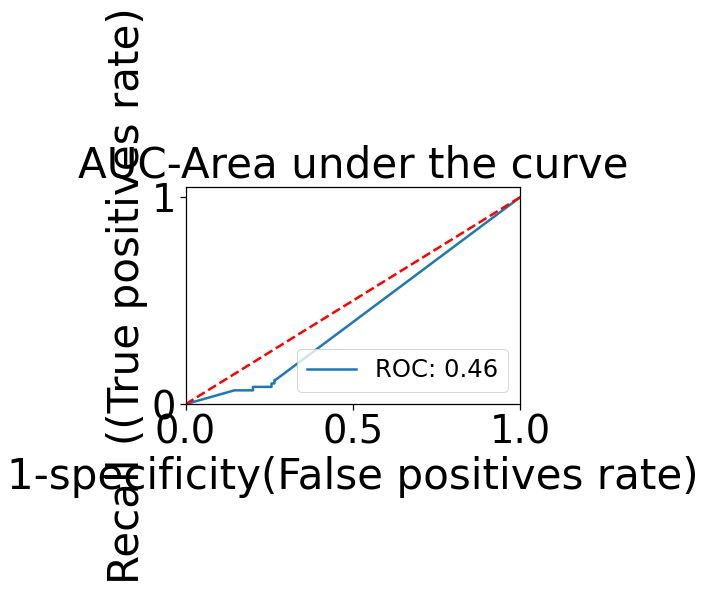

AUC curve:  0.46


In [64]:
#Libraries import
from sklearn.metrics import roc_curve

#AUC Curve Plot
#Model application
Model_used_no_fit = LogisticRegression(C = 1, l1_ratio = 0.1, penalty = "l1",solver="saga", random_state = 99)
Model_used = Model_used_no_fit.fit(Xtrain,Ytrain)

false_positives_rate, true_positives_rate, threshold = roc_curve(Yvalidation,Model_used.predict_proba(Xvalidation)[:,1])  
auc_curve = np.round(roc_auc_score(Yvalidation,Model_used_no_fit.predict(Xvalidation)),2)
plt.plot(false_positives_rate, true_positives_rate, label="ROC: "+str(auc_curve))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-specificity(False positives rate)')
plt.ylabel('Recall ((True positives rate)')
plt.title('AUC-Area under the curve')
plt.legend(loc="lower right", fontsize ='xx-small')
plt.show()   # Display
print("AUC curve: ",np.round(auc_curve,2))

Feature Importance

,Feature Permutation Importance
enrollment days,0.001256
AcceptedCmp3,0.016609
AcceptedCmp5,-0.001814
MntMeatProducts,-0.000419
AcceptedCmp4,0.005443
Education_PhD,0.023308
NumWebVisitsMonth,-0.000837
Marital_Status_Single,0.001954
AcceptedCmp1,0.008374
NumCatalogPurchases,0.000140


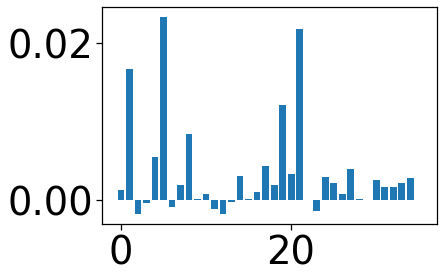

In [65]:
#Libraries import
from sklearn.inspection import permutation_importance
#Permutation importance calculation
results = permutation_importance(Model_used, Xtrain,Ytrain, scoring='accuracy')
#Importance calculation
importance = results.importances_mean
#Feature Importance summary
Feature_Importance = df(importance,index=[coefs_Selected_model.index],columns=["Feature Permutation Importance"]) 
display(Feature_Importance)
#Feature Importance Plot
plt.bar([x for x in range(len(importance))], importance)
plt.show()

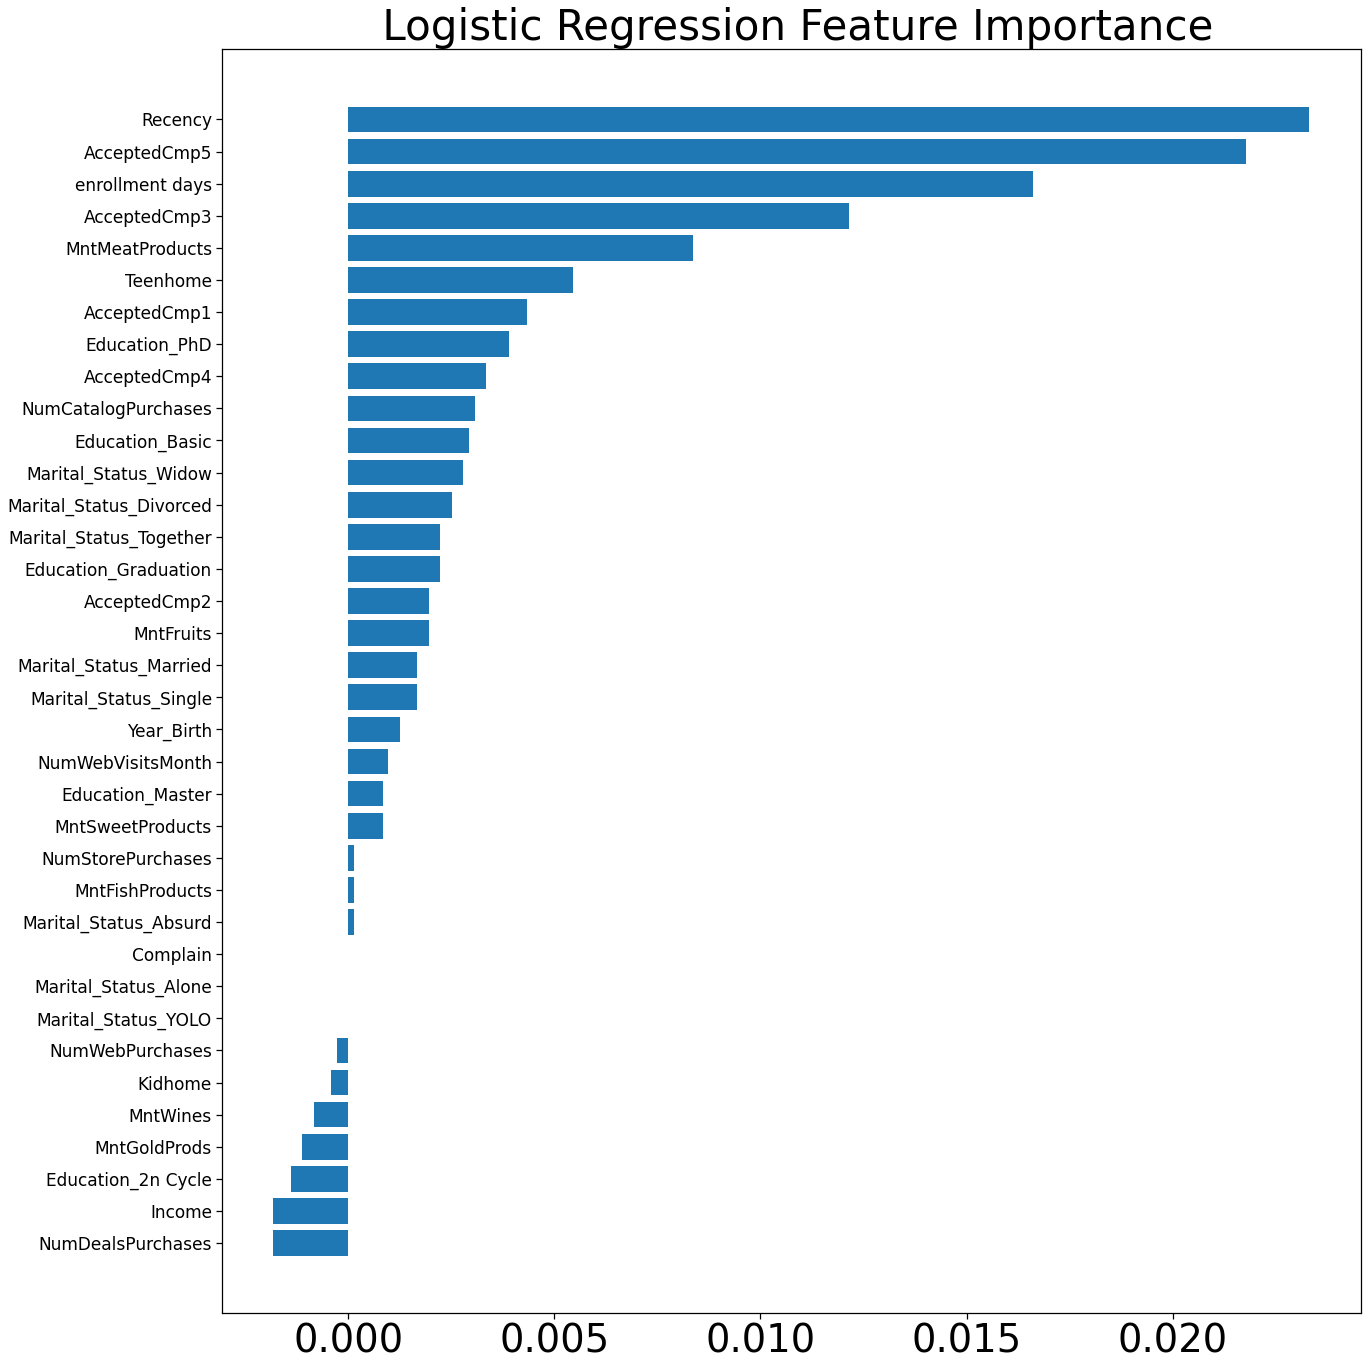

In [66]:
#Libraries import
import matplotlib
plt.rc('ytick', labelsize=17) 
plt.rcParams["figure.figsize"] = (20,20)
sorted_idx = importance.argsort()
y_ticks = np.arange(0, Xtest.shape[1])
matplotlib.rcParams.update({'font.size': 40})
fig, ax = plt.subplots()
ax.barh(y_ticks, importance[sorted_idx])
ax.set_yticklabels(Xtest.columns[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title(" Logistic Regression Feature Importance")
fig.tight_layout()
plt.show()